In [1]:
from obspy.core import Stream, read
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl 
from matplotlib.colors import Normalize
import pandas as pd
import os 
import os.path

In [3]:
path_to_files = '/Users/sydneydybing/StrainProject/2024/'

earthquakes = pd.read_csv(path_to_files + 'M6_catalog_2004-2024.csv', dtype = str)

weird_events_only = False
if weird_events_only:
    earthquakes = earthquakes.iloc[[4,15]]

small_test = False
if small_test:
    earthquakes = earthquakes[5:7]
    
one_at_a_time = True
if one_at_a_time:
    earthquakes = earthquakes[:1]

origin_times = earthquakes.time.values
mags = earthquakes.mag.values

bsm_mda = pd.read_csv(path_to_files + 'bsm_metadata.csv')
NA_only = bsm_mda.loc[bsm_mda['LONG'] < -110]
stas = NA_only['BNUM'].values

eqs_test = earthquakes[4:5]
ots_test = origin_times[4:5]
mags_test = mags[4:5]
rows_for_extra_times = [8,9,14,16]

dist_array = np.load('/Users/sydneydybing/StrainProject/2024/NA_evt-sta_dist_array_less500km_withdata.npy')

# Array order:

# 0. Earthquake identifier
# 1. Earthquake origin time
# 2. Earthquake latitude
# 3. Earthquake longitude
# 4. Earthquake magnitude
# 5. Station name
# 6. Station latitude
# 7. Station longitude
# 8. Hypocentral distance (km)

Earthquake 1/1
B001
20.0
20.0
100.0
20.0


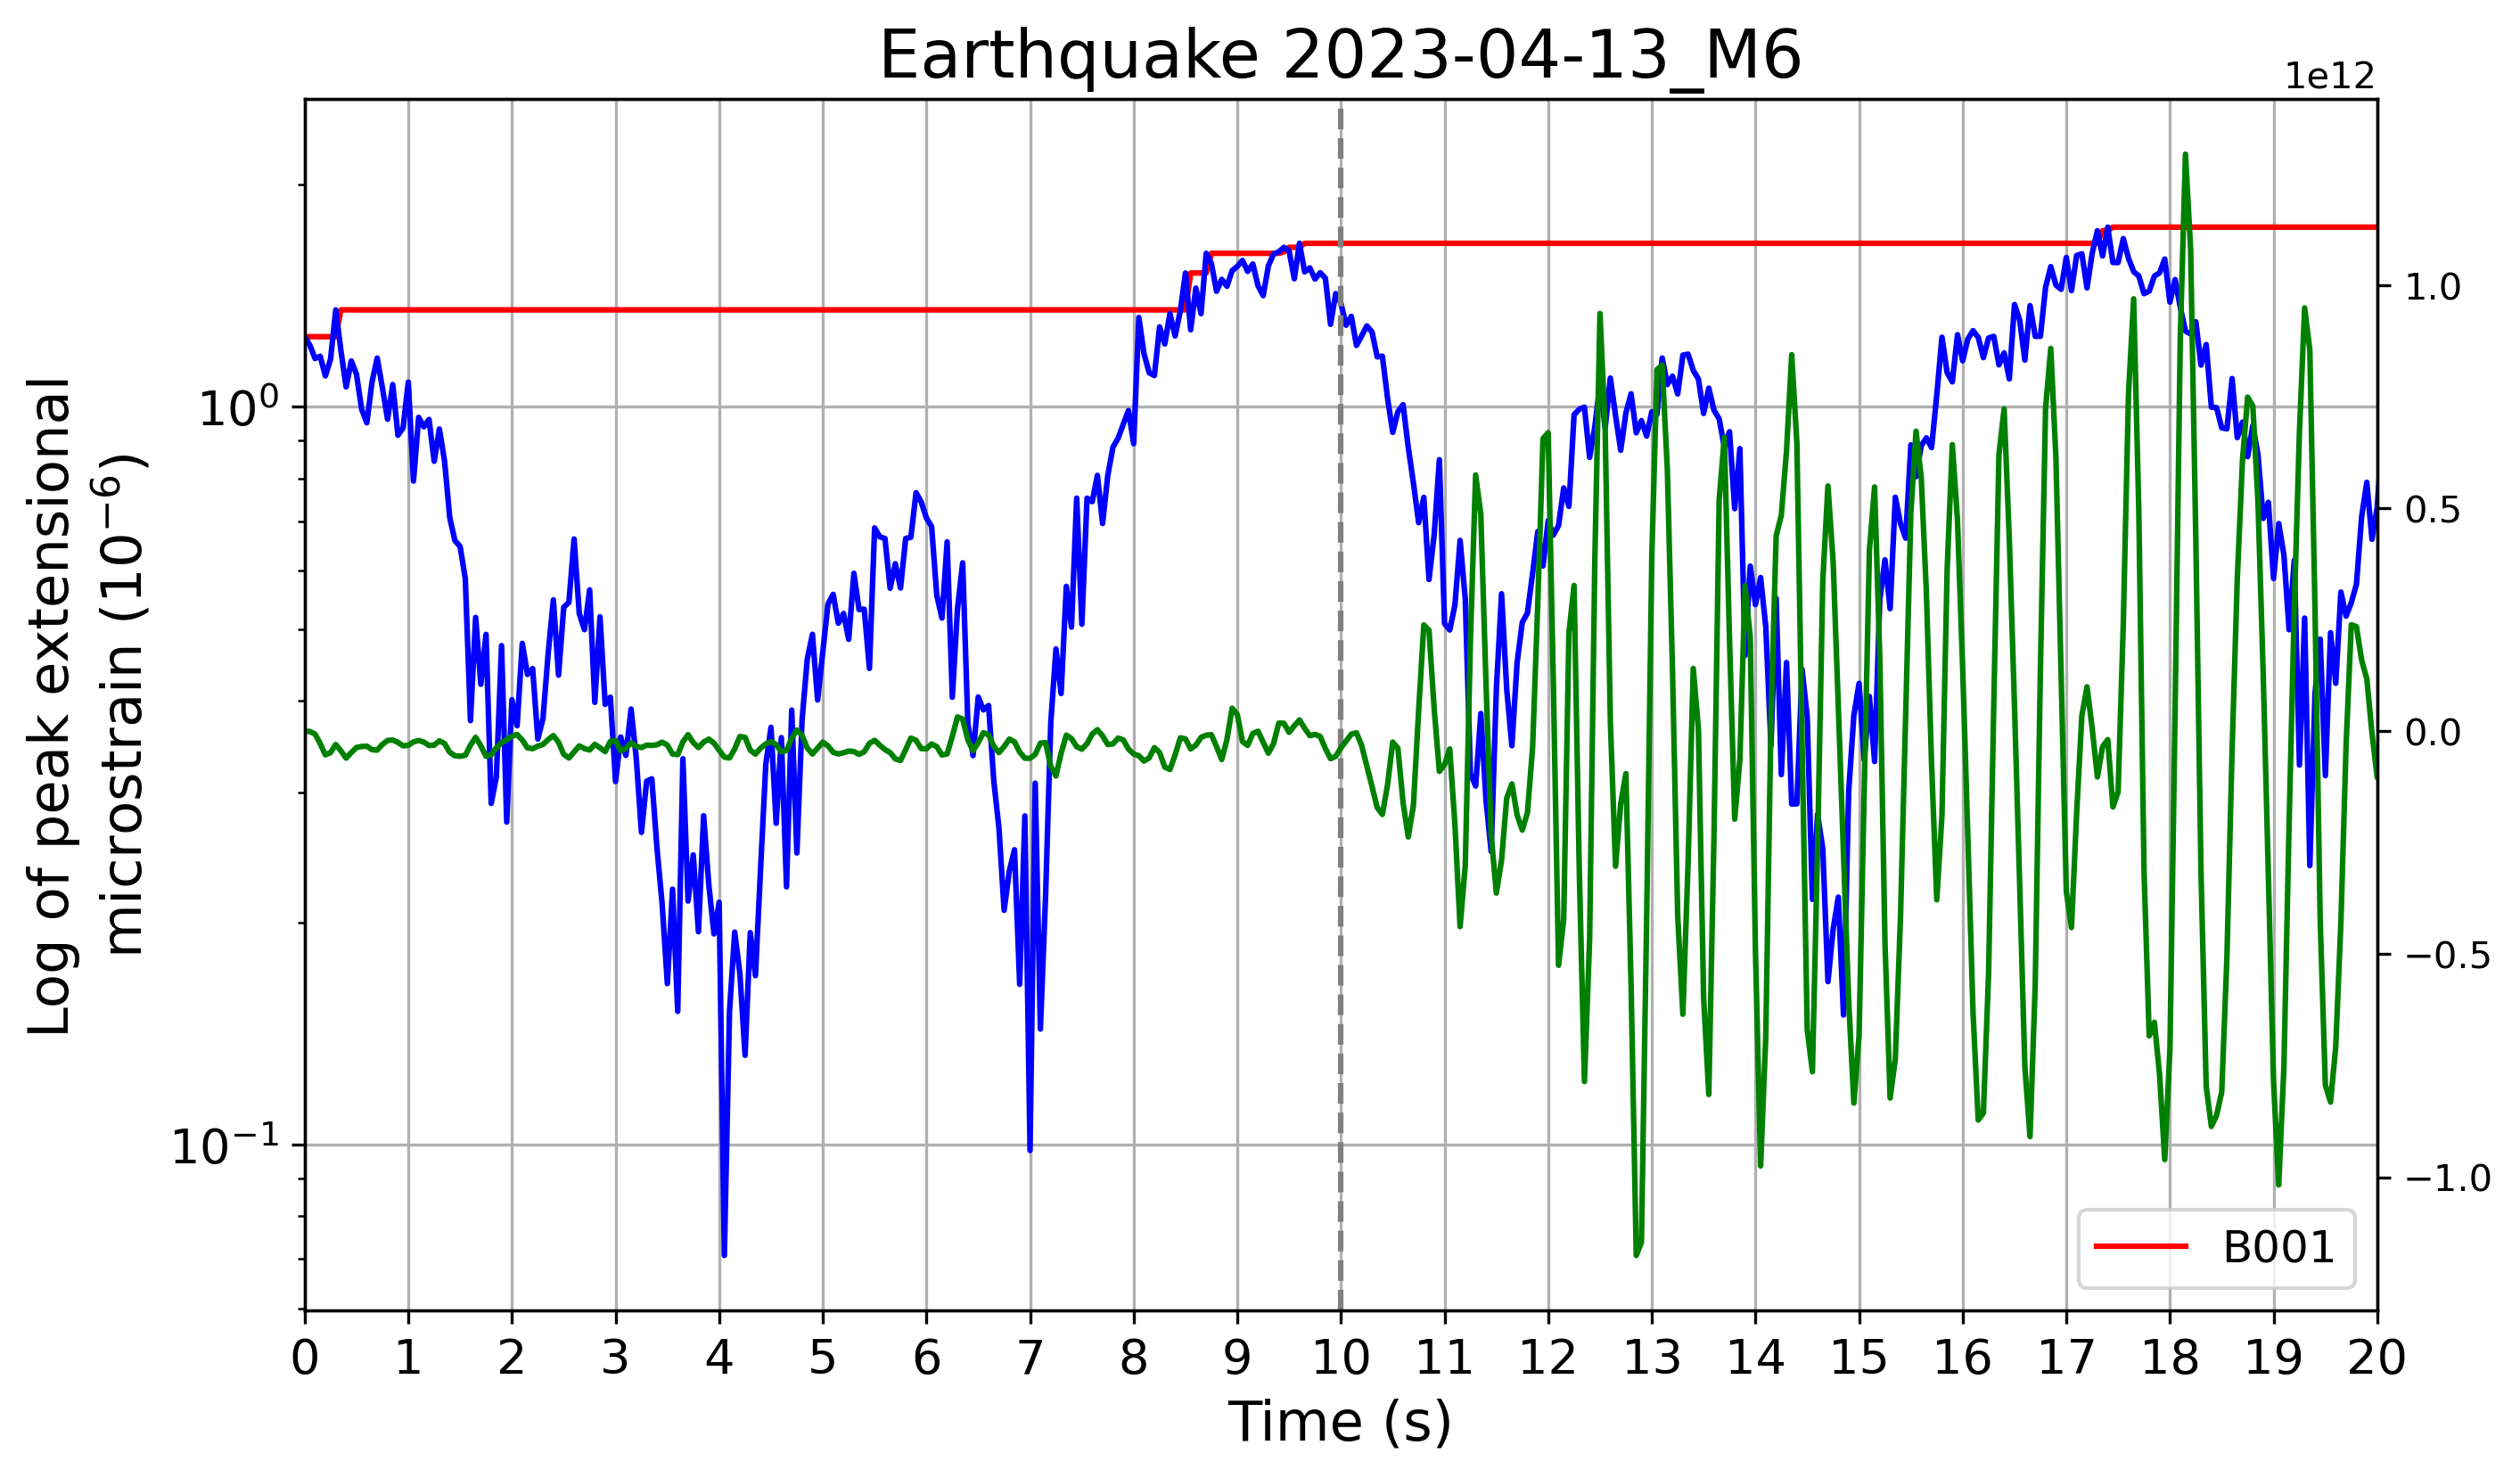

B003
20.0
20.0
100.0
20.0


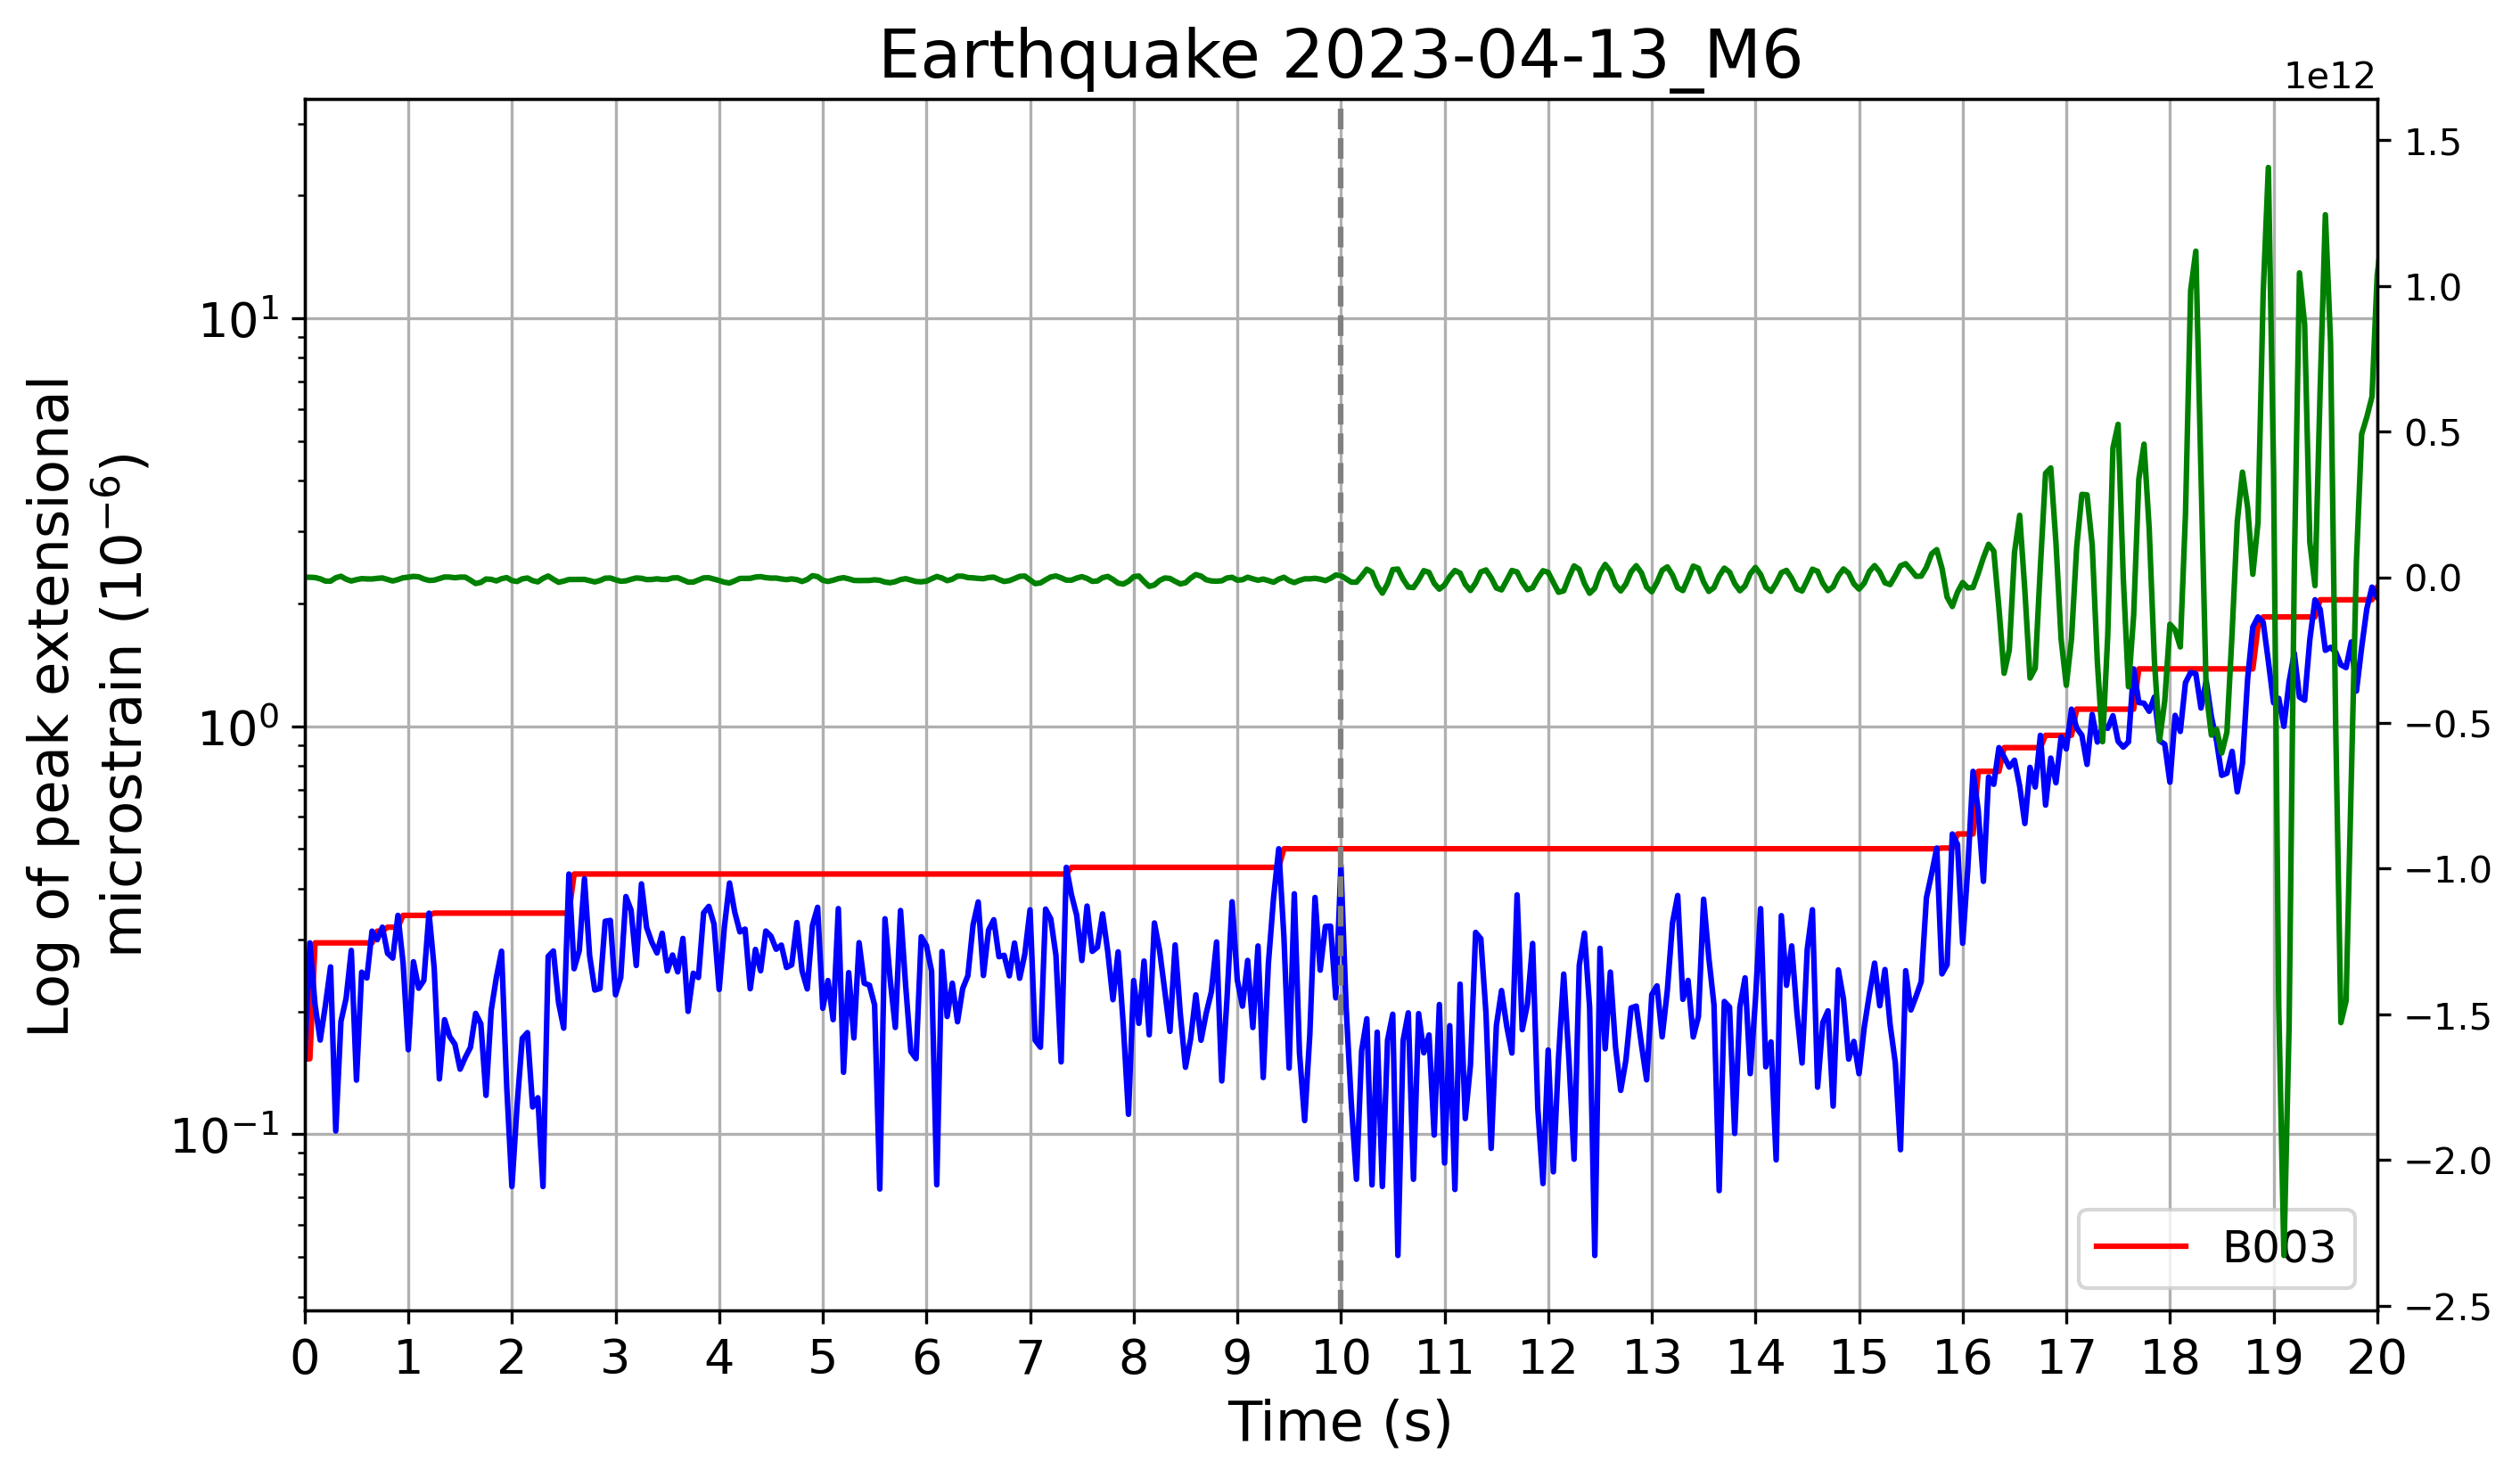

B004
20.0
20.0
100.0
20.0


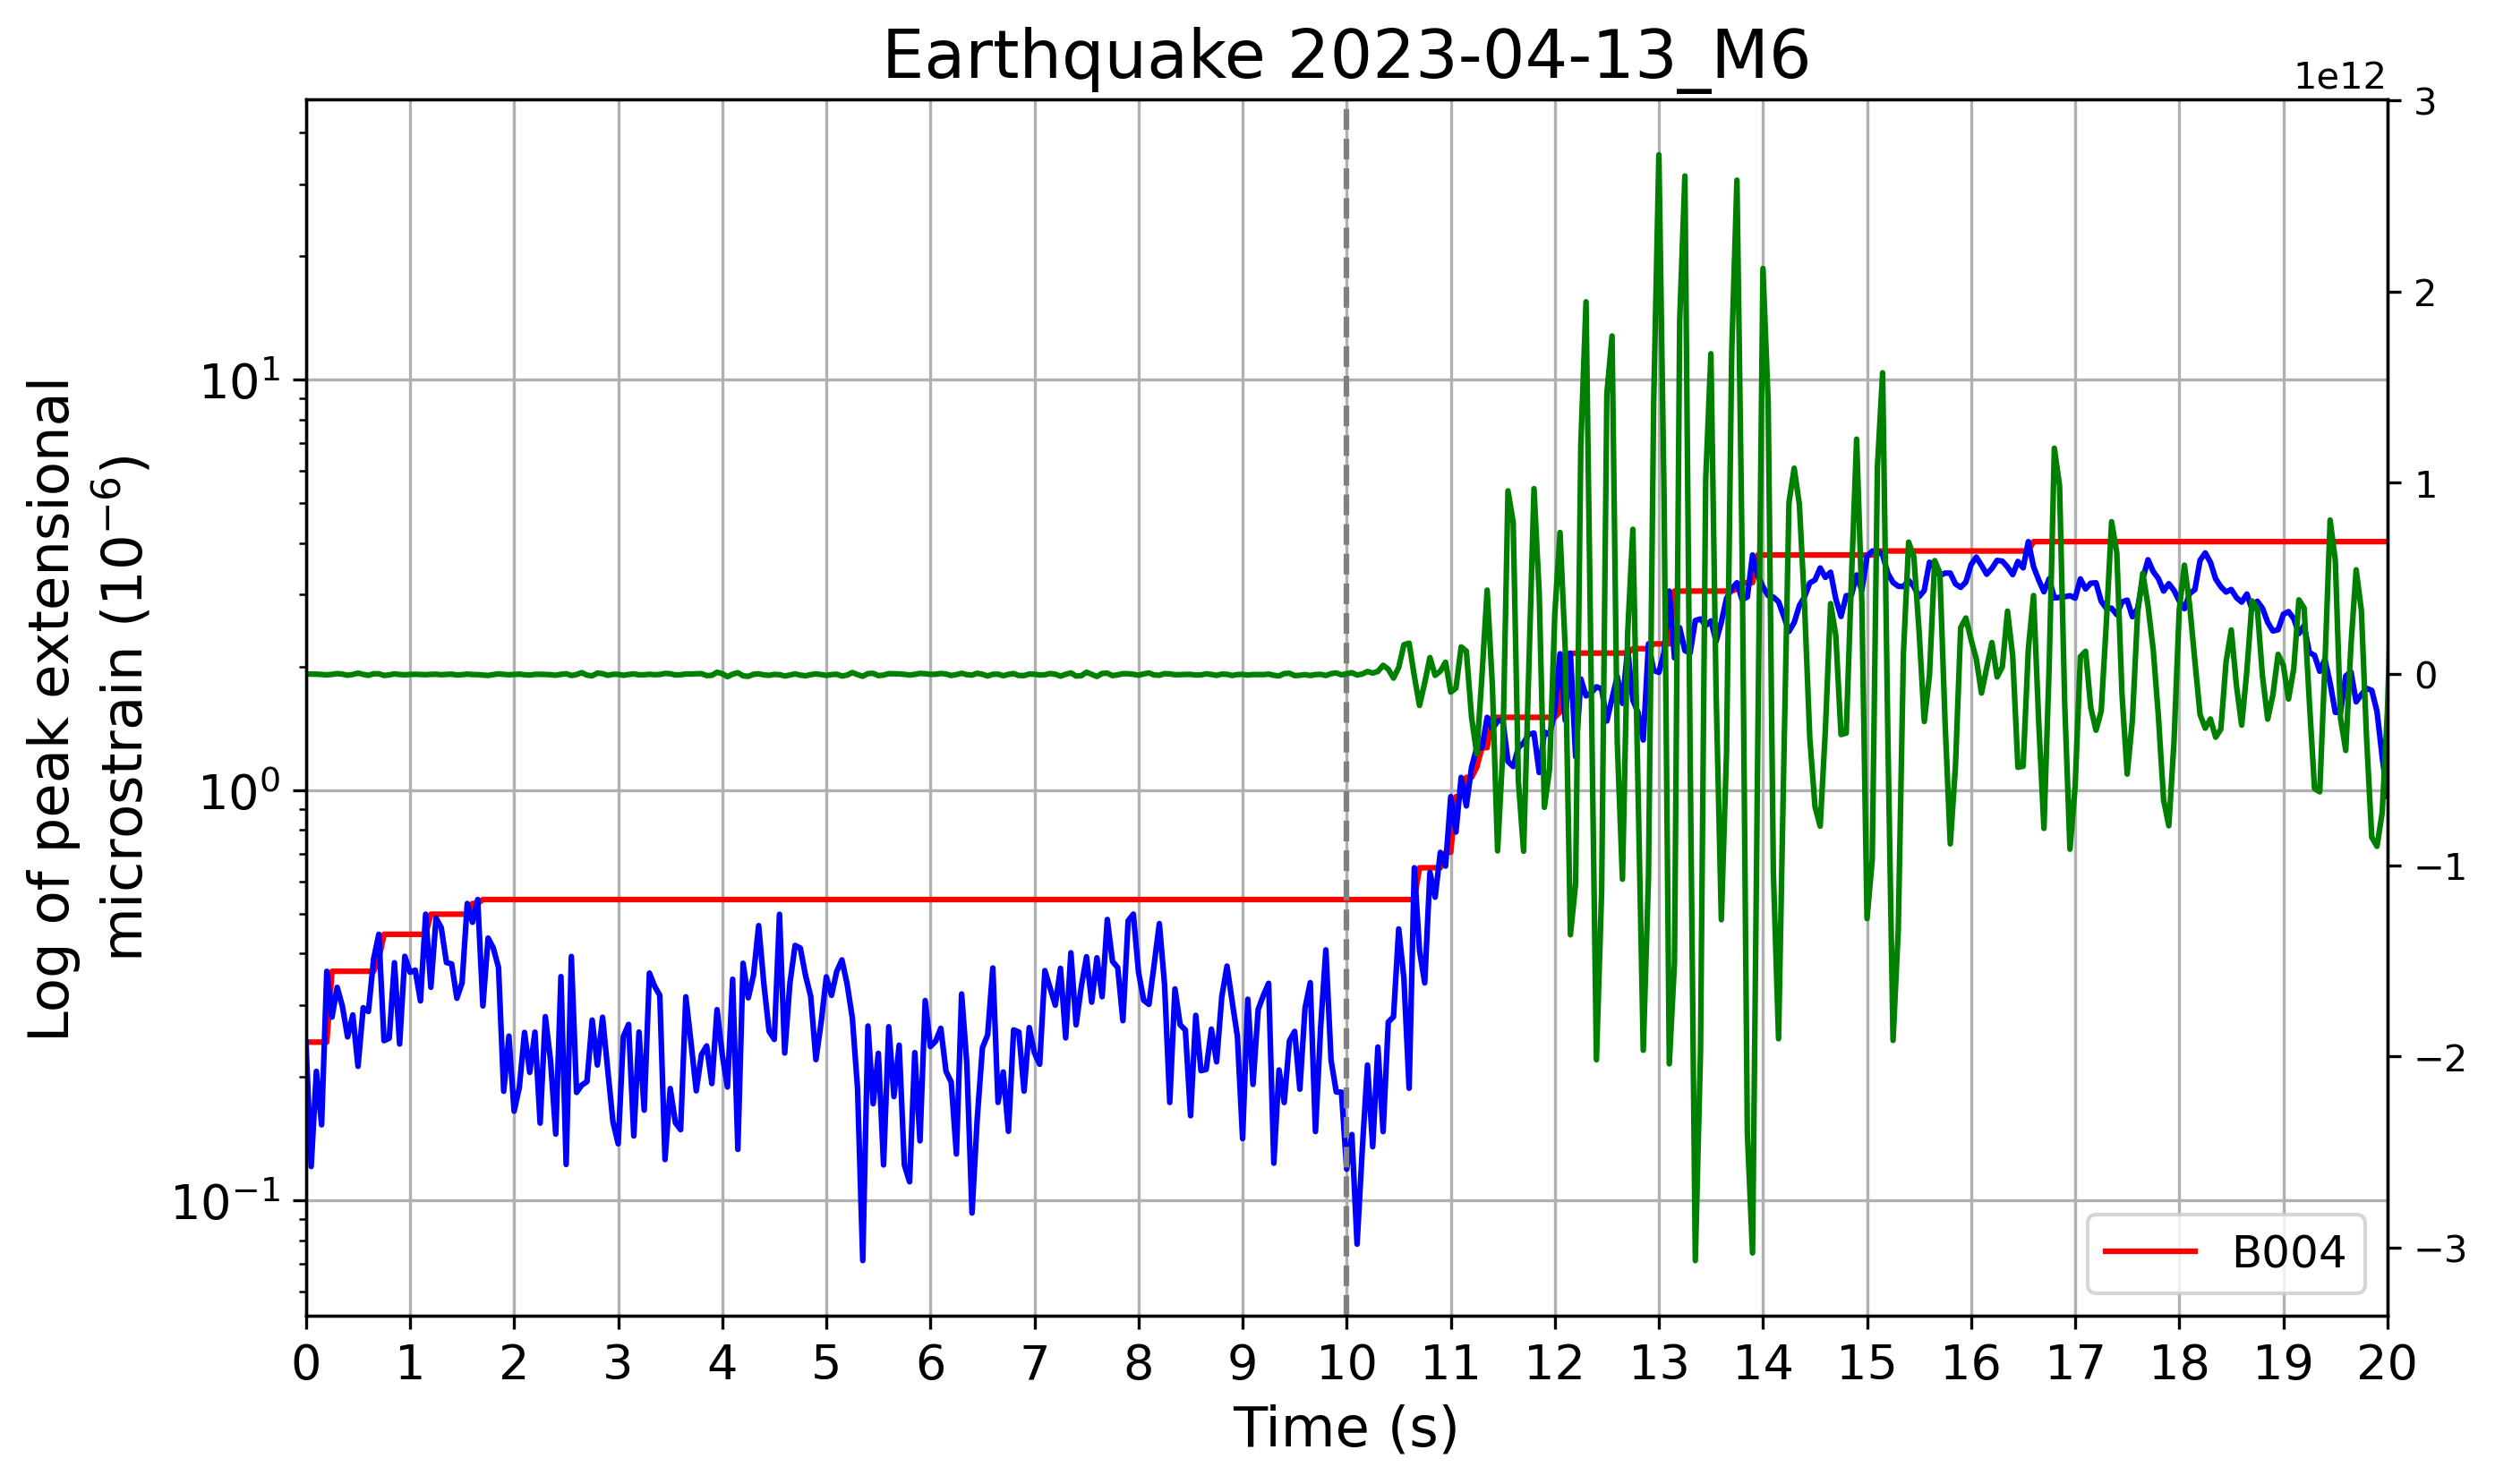

B005
20.0
20.0
100.0
20.0


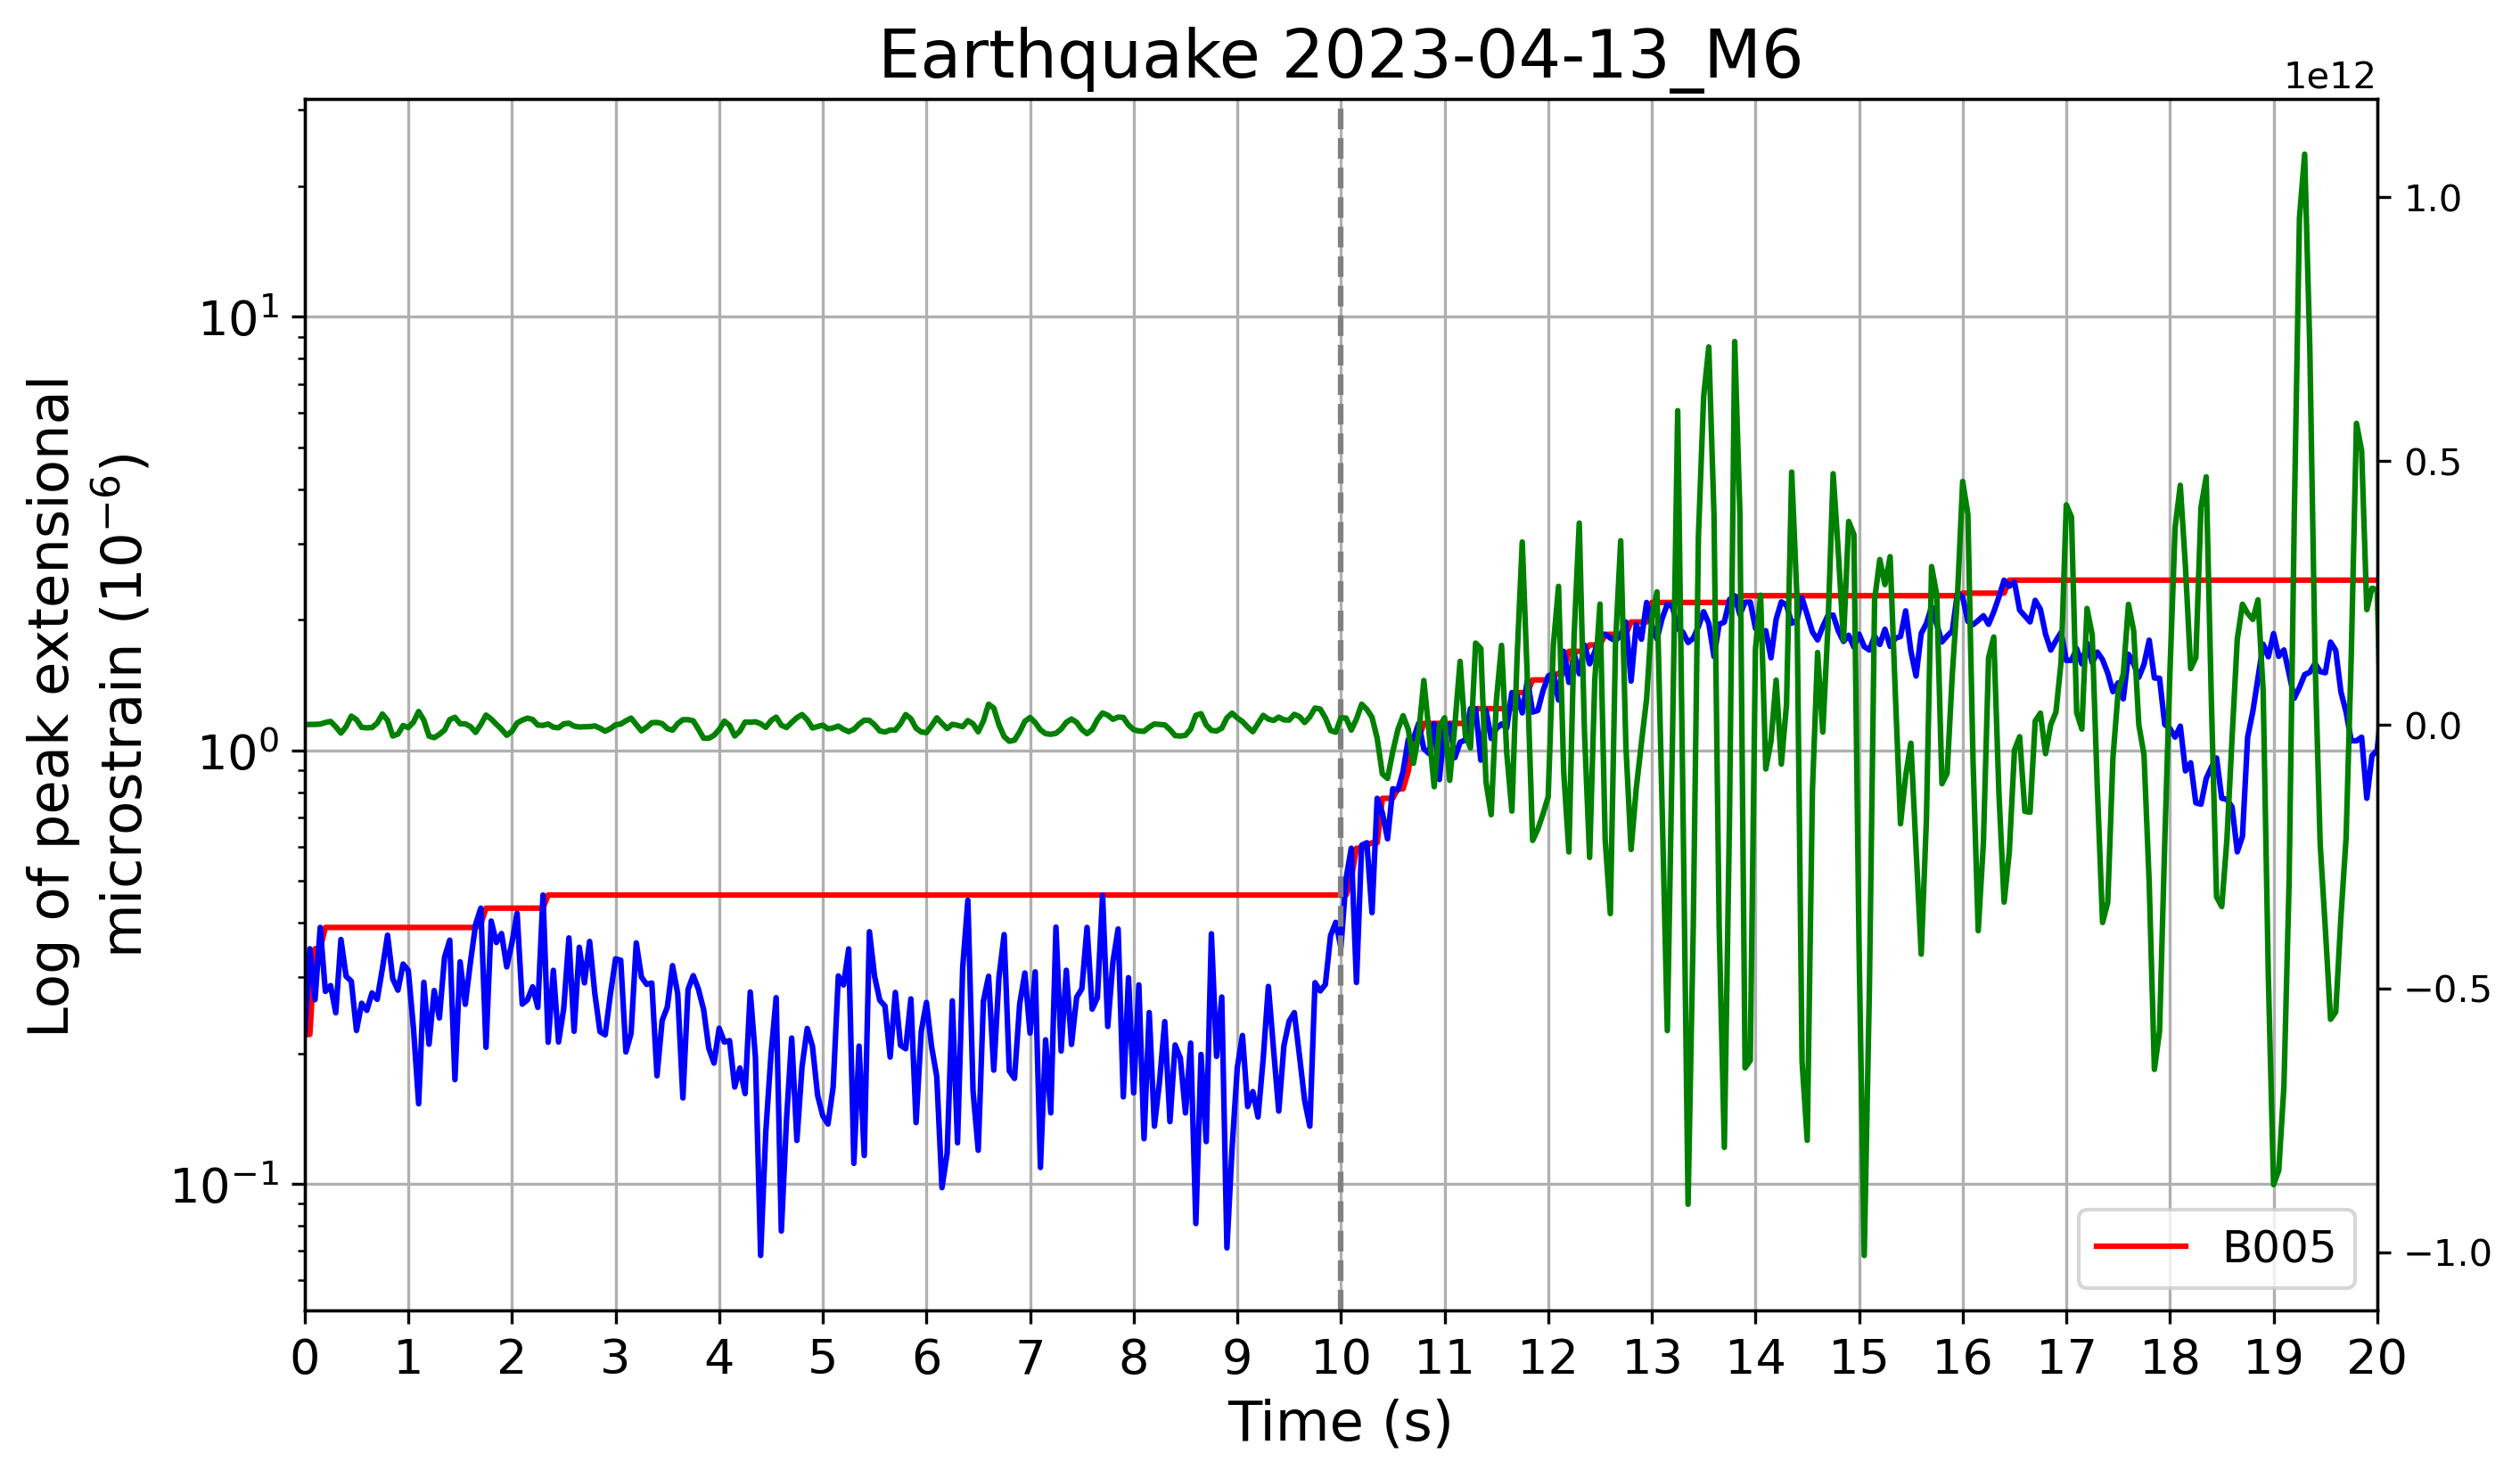

B006
20.0
20.0
100.0
20.0


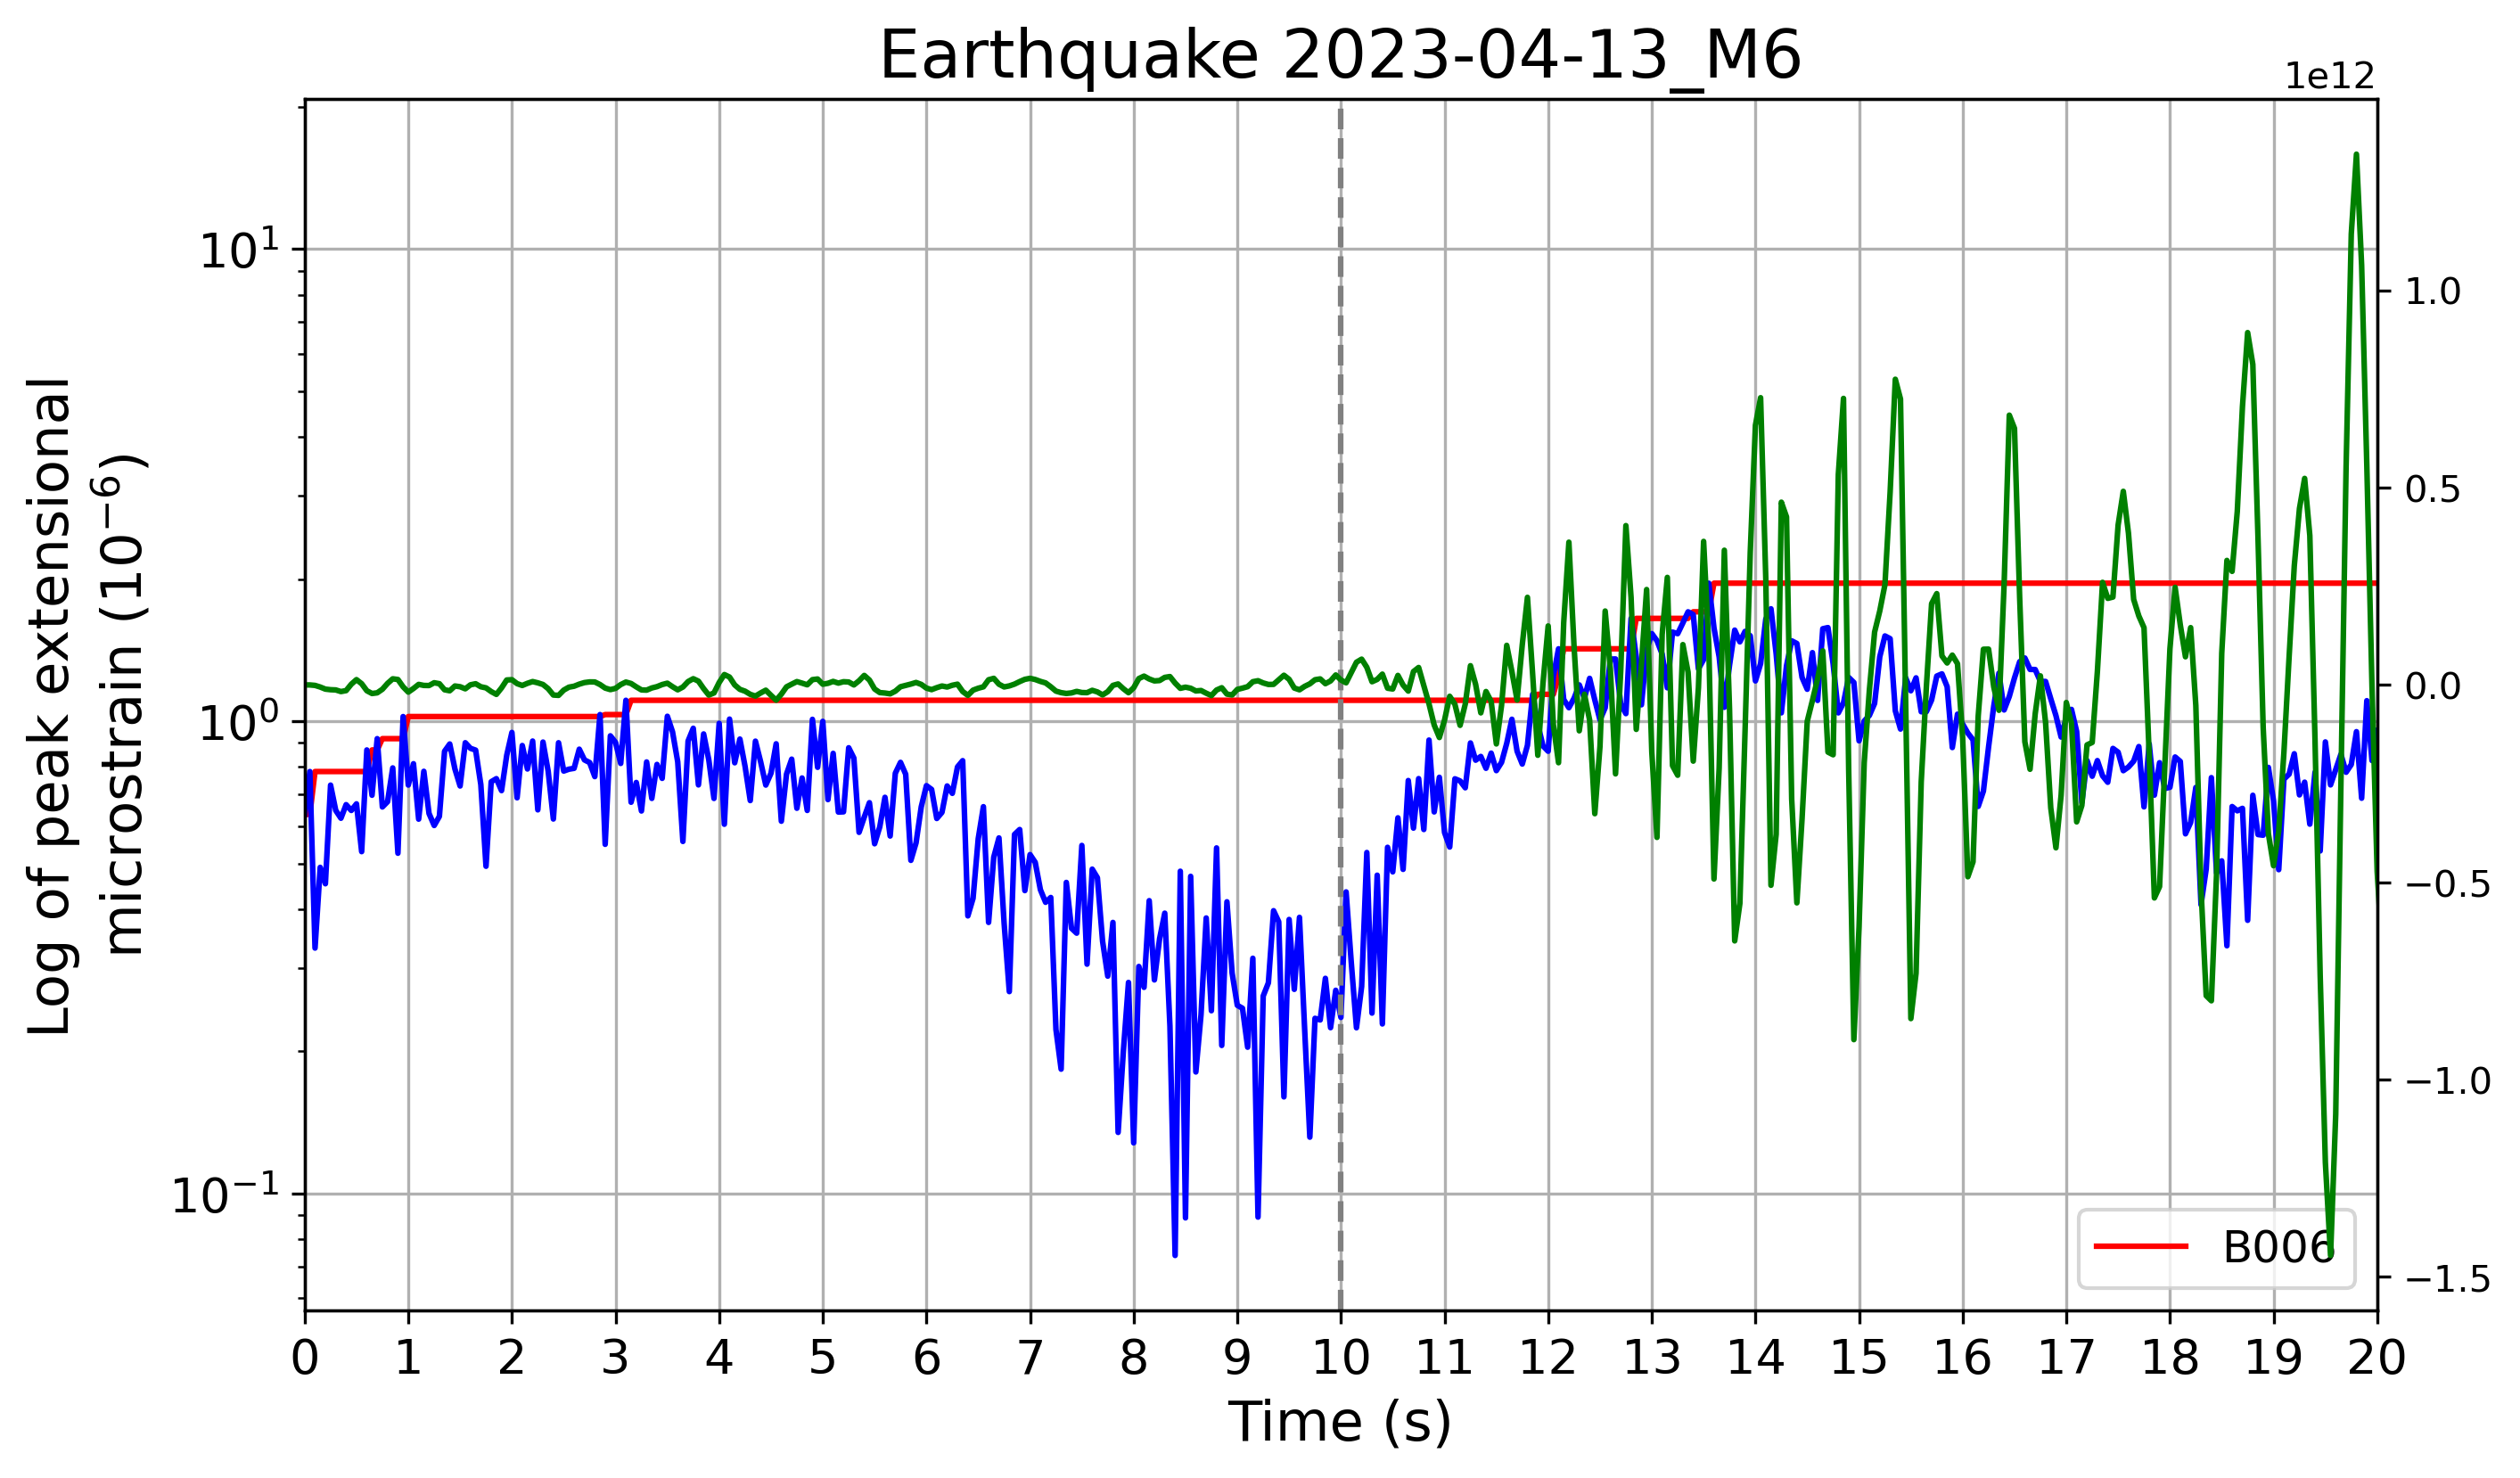

B007
20.0
20.0
100.0
20.0


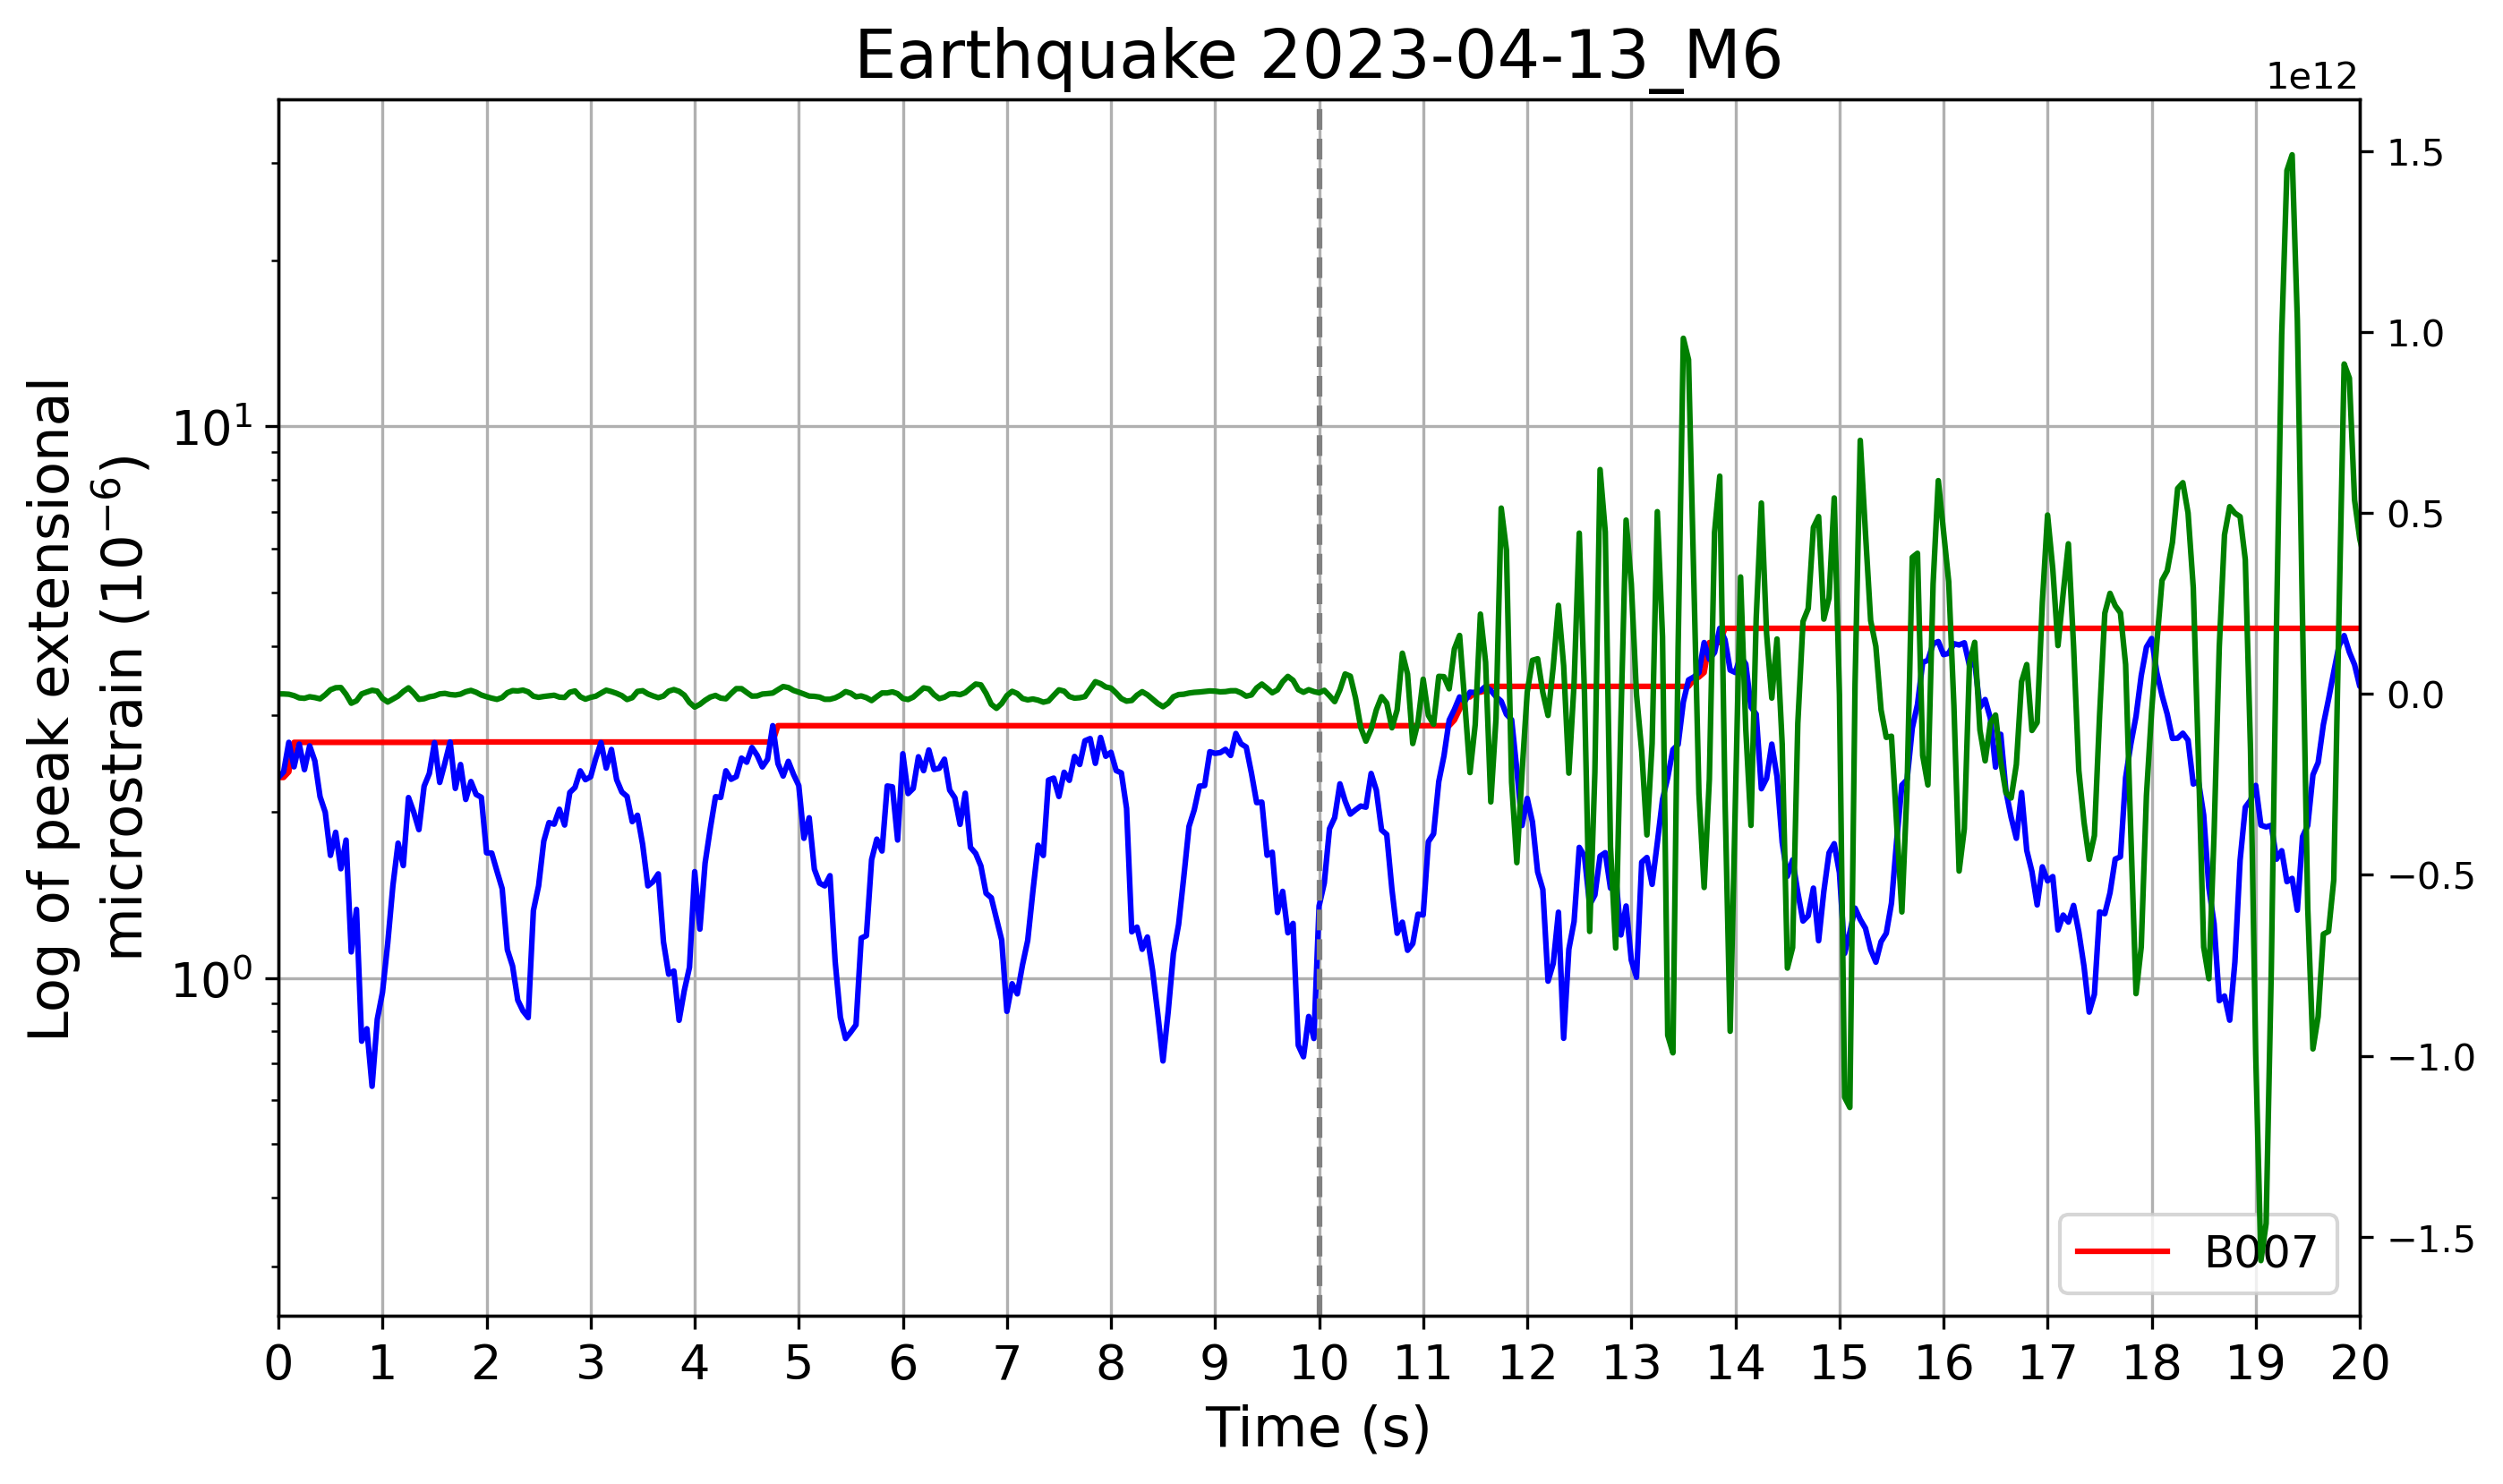

B009
20.0
20.0
100.0
20.0


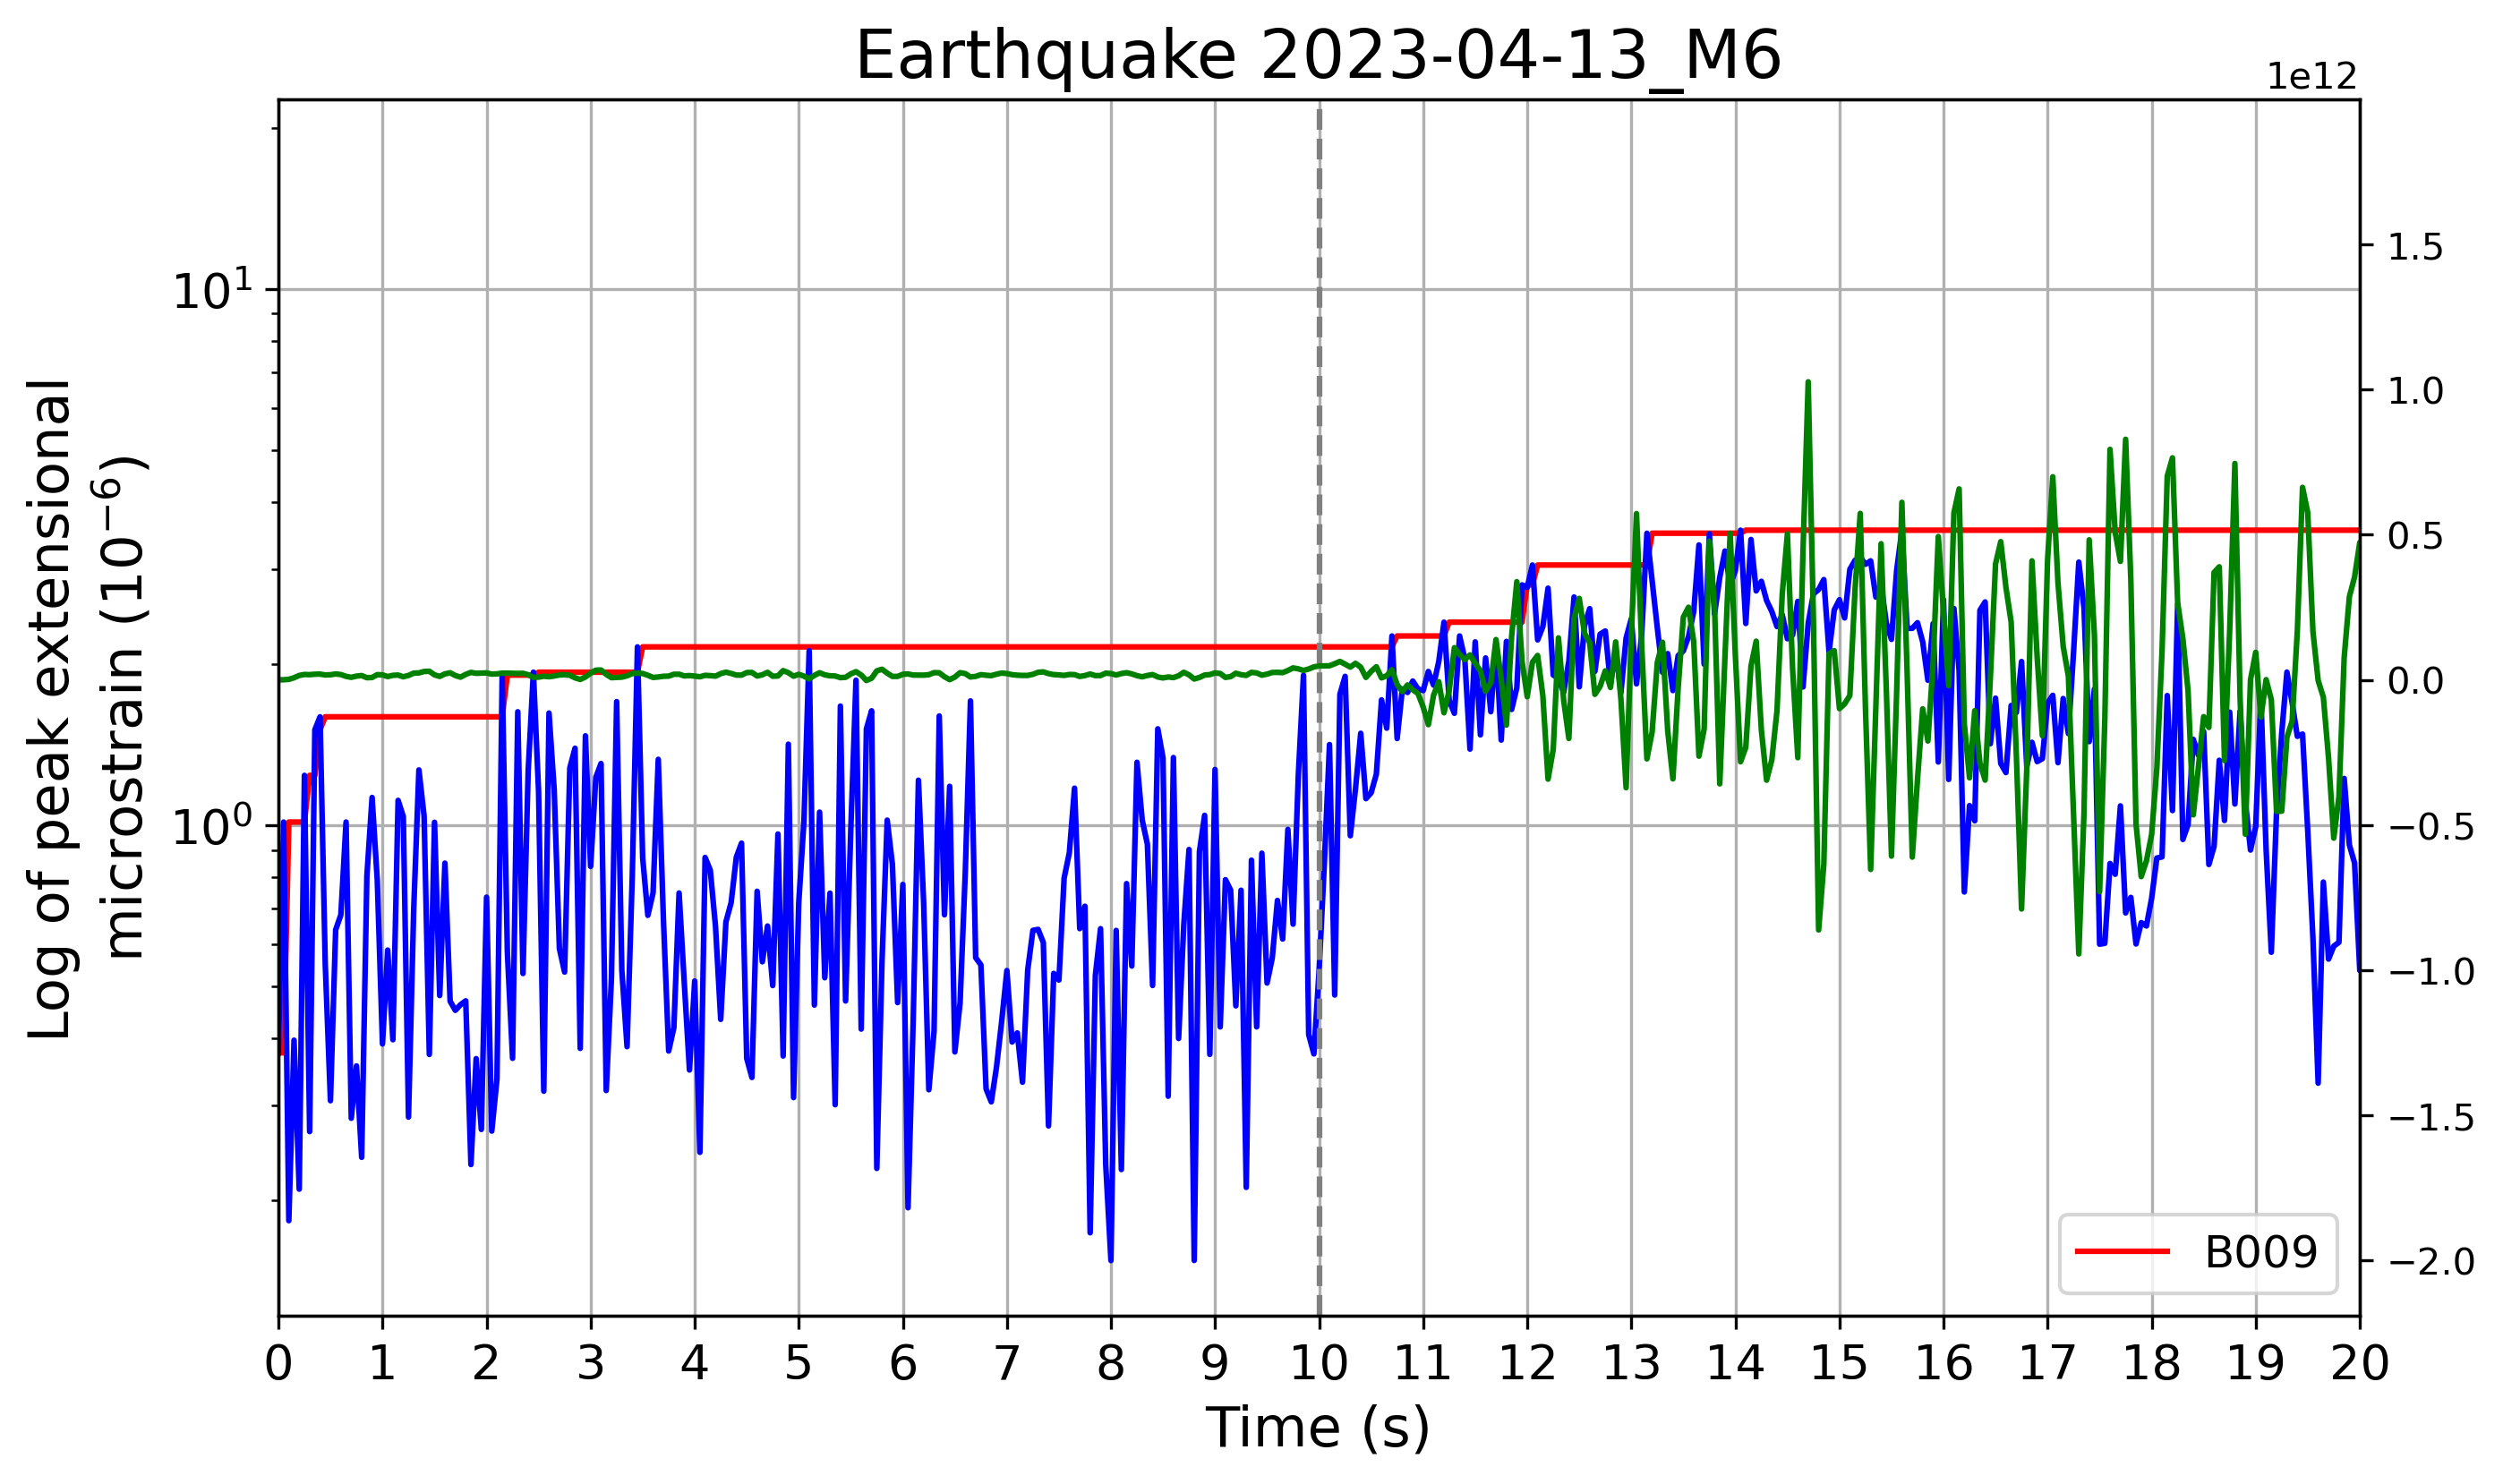

B010
20.0
20.0
100.0
20.0


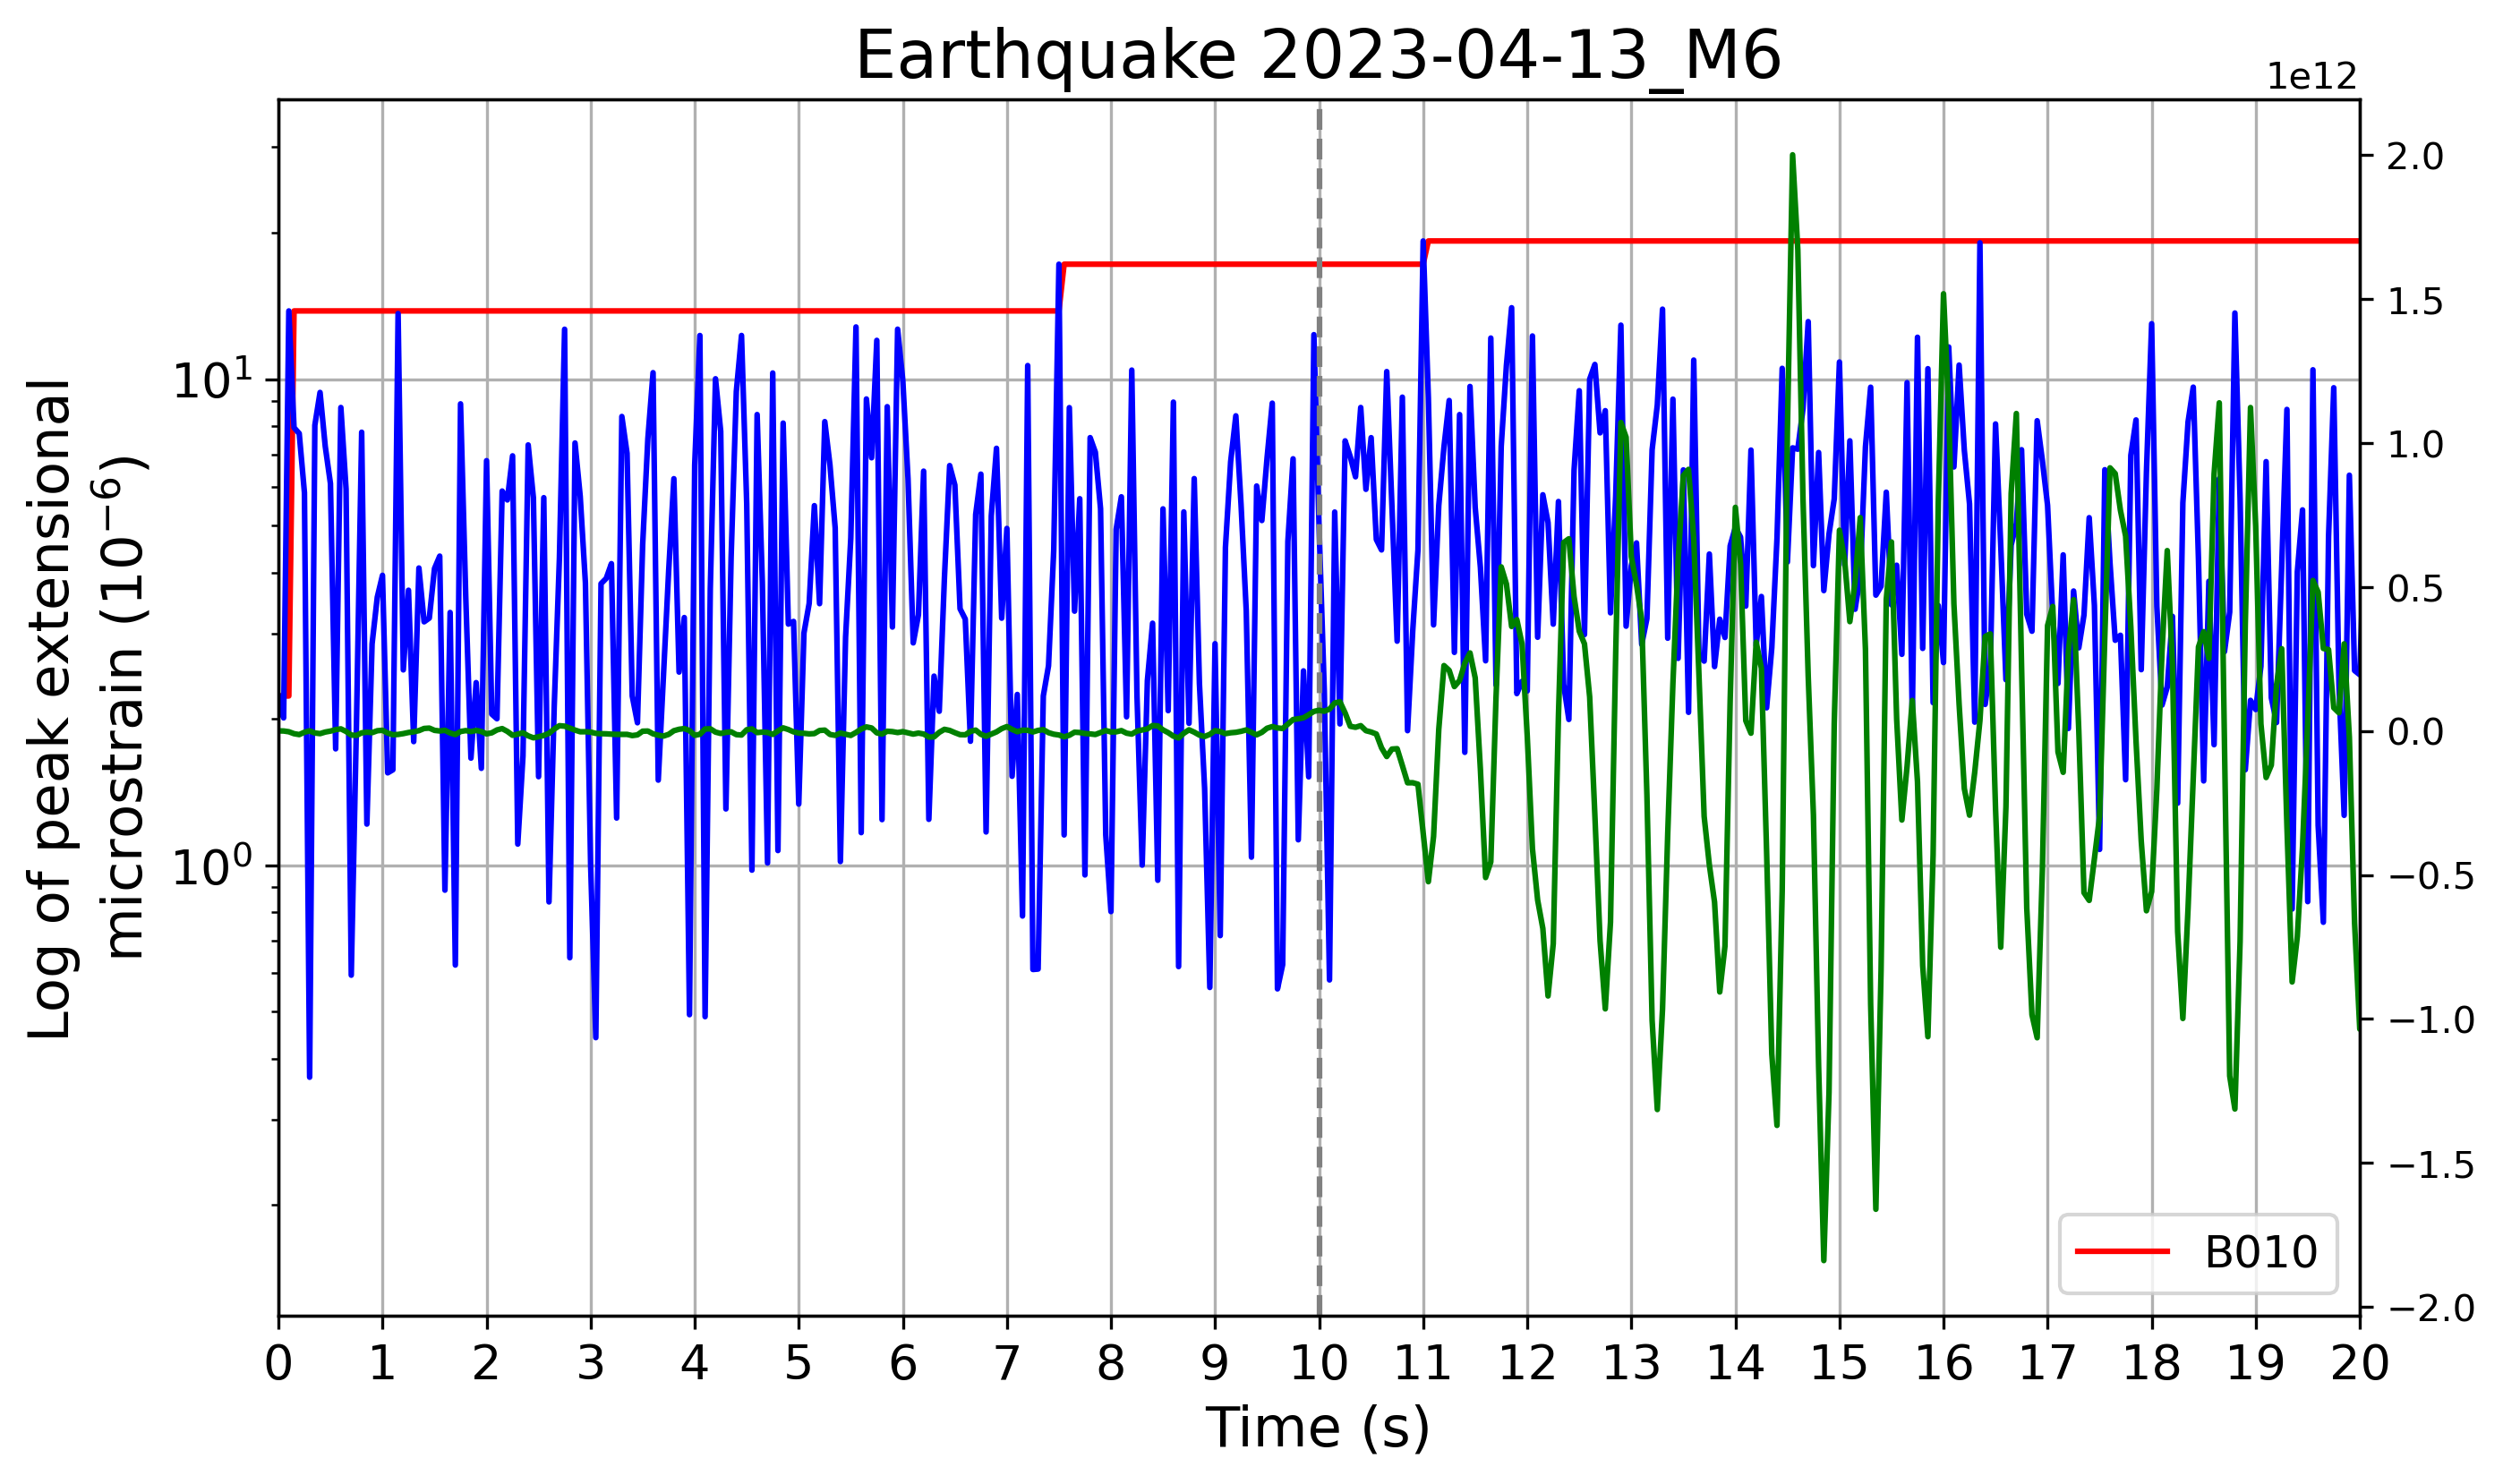

B011
B012
20.0
20.0
100.0
20.0


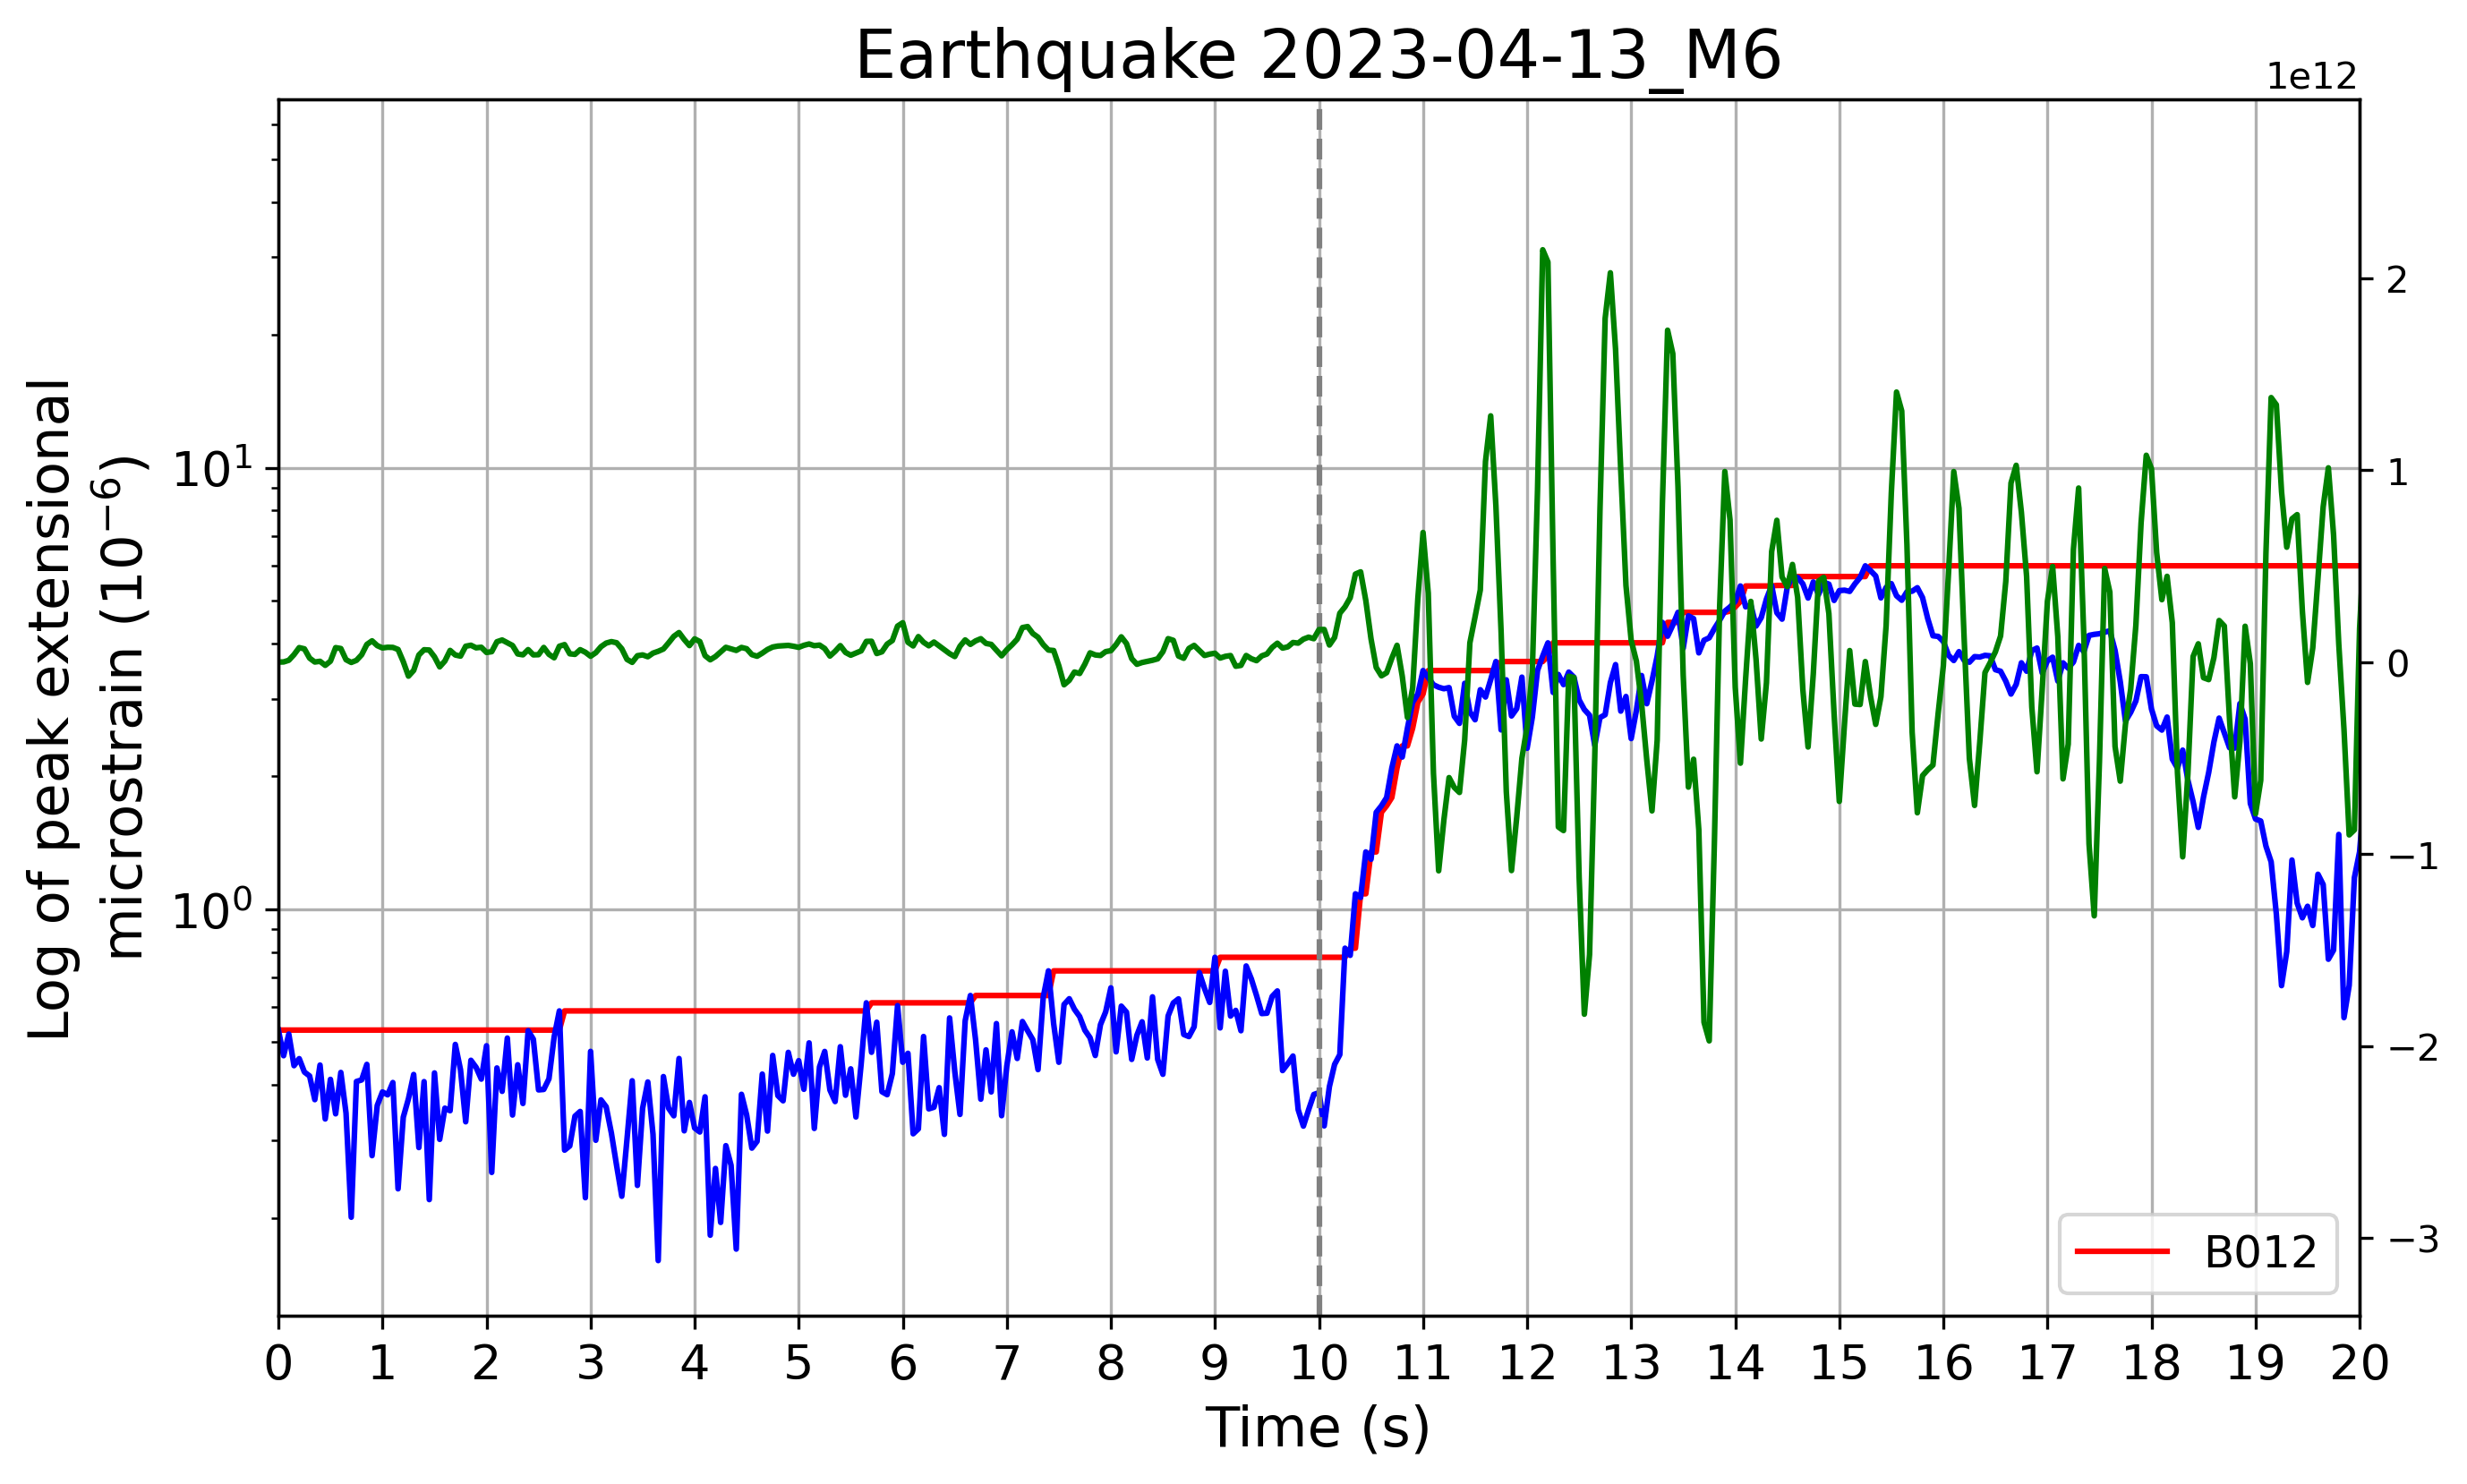

B013
B014
B017
B018
B019
B020
B022
B023
B024
B026
B027
B028
B030
B031
B032
B033
B035
B036
B039
B040
B045
B054
B057
B058
B065
B066
B067
B072
B073
B075
B076
B078
B079
B081
B082
B084
B086
B087
B088
B089
B093
B201
B202
B203
B204
B205
B206
B207
B208
B900
B901
B916
B917
B918
B921
B926
B927
20.0
20.0
100.0
20.0


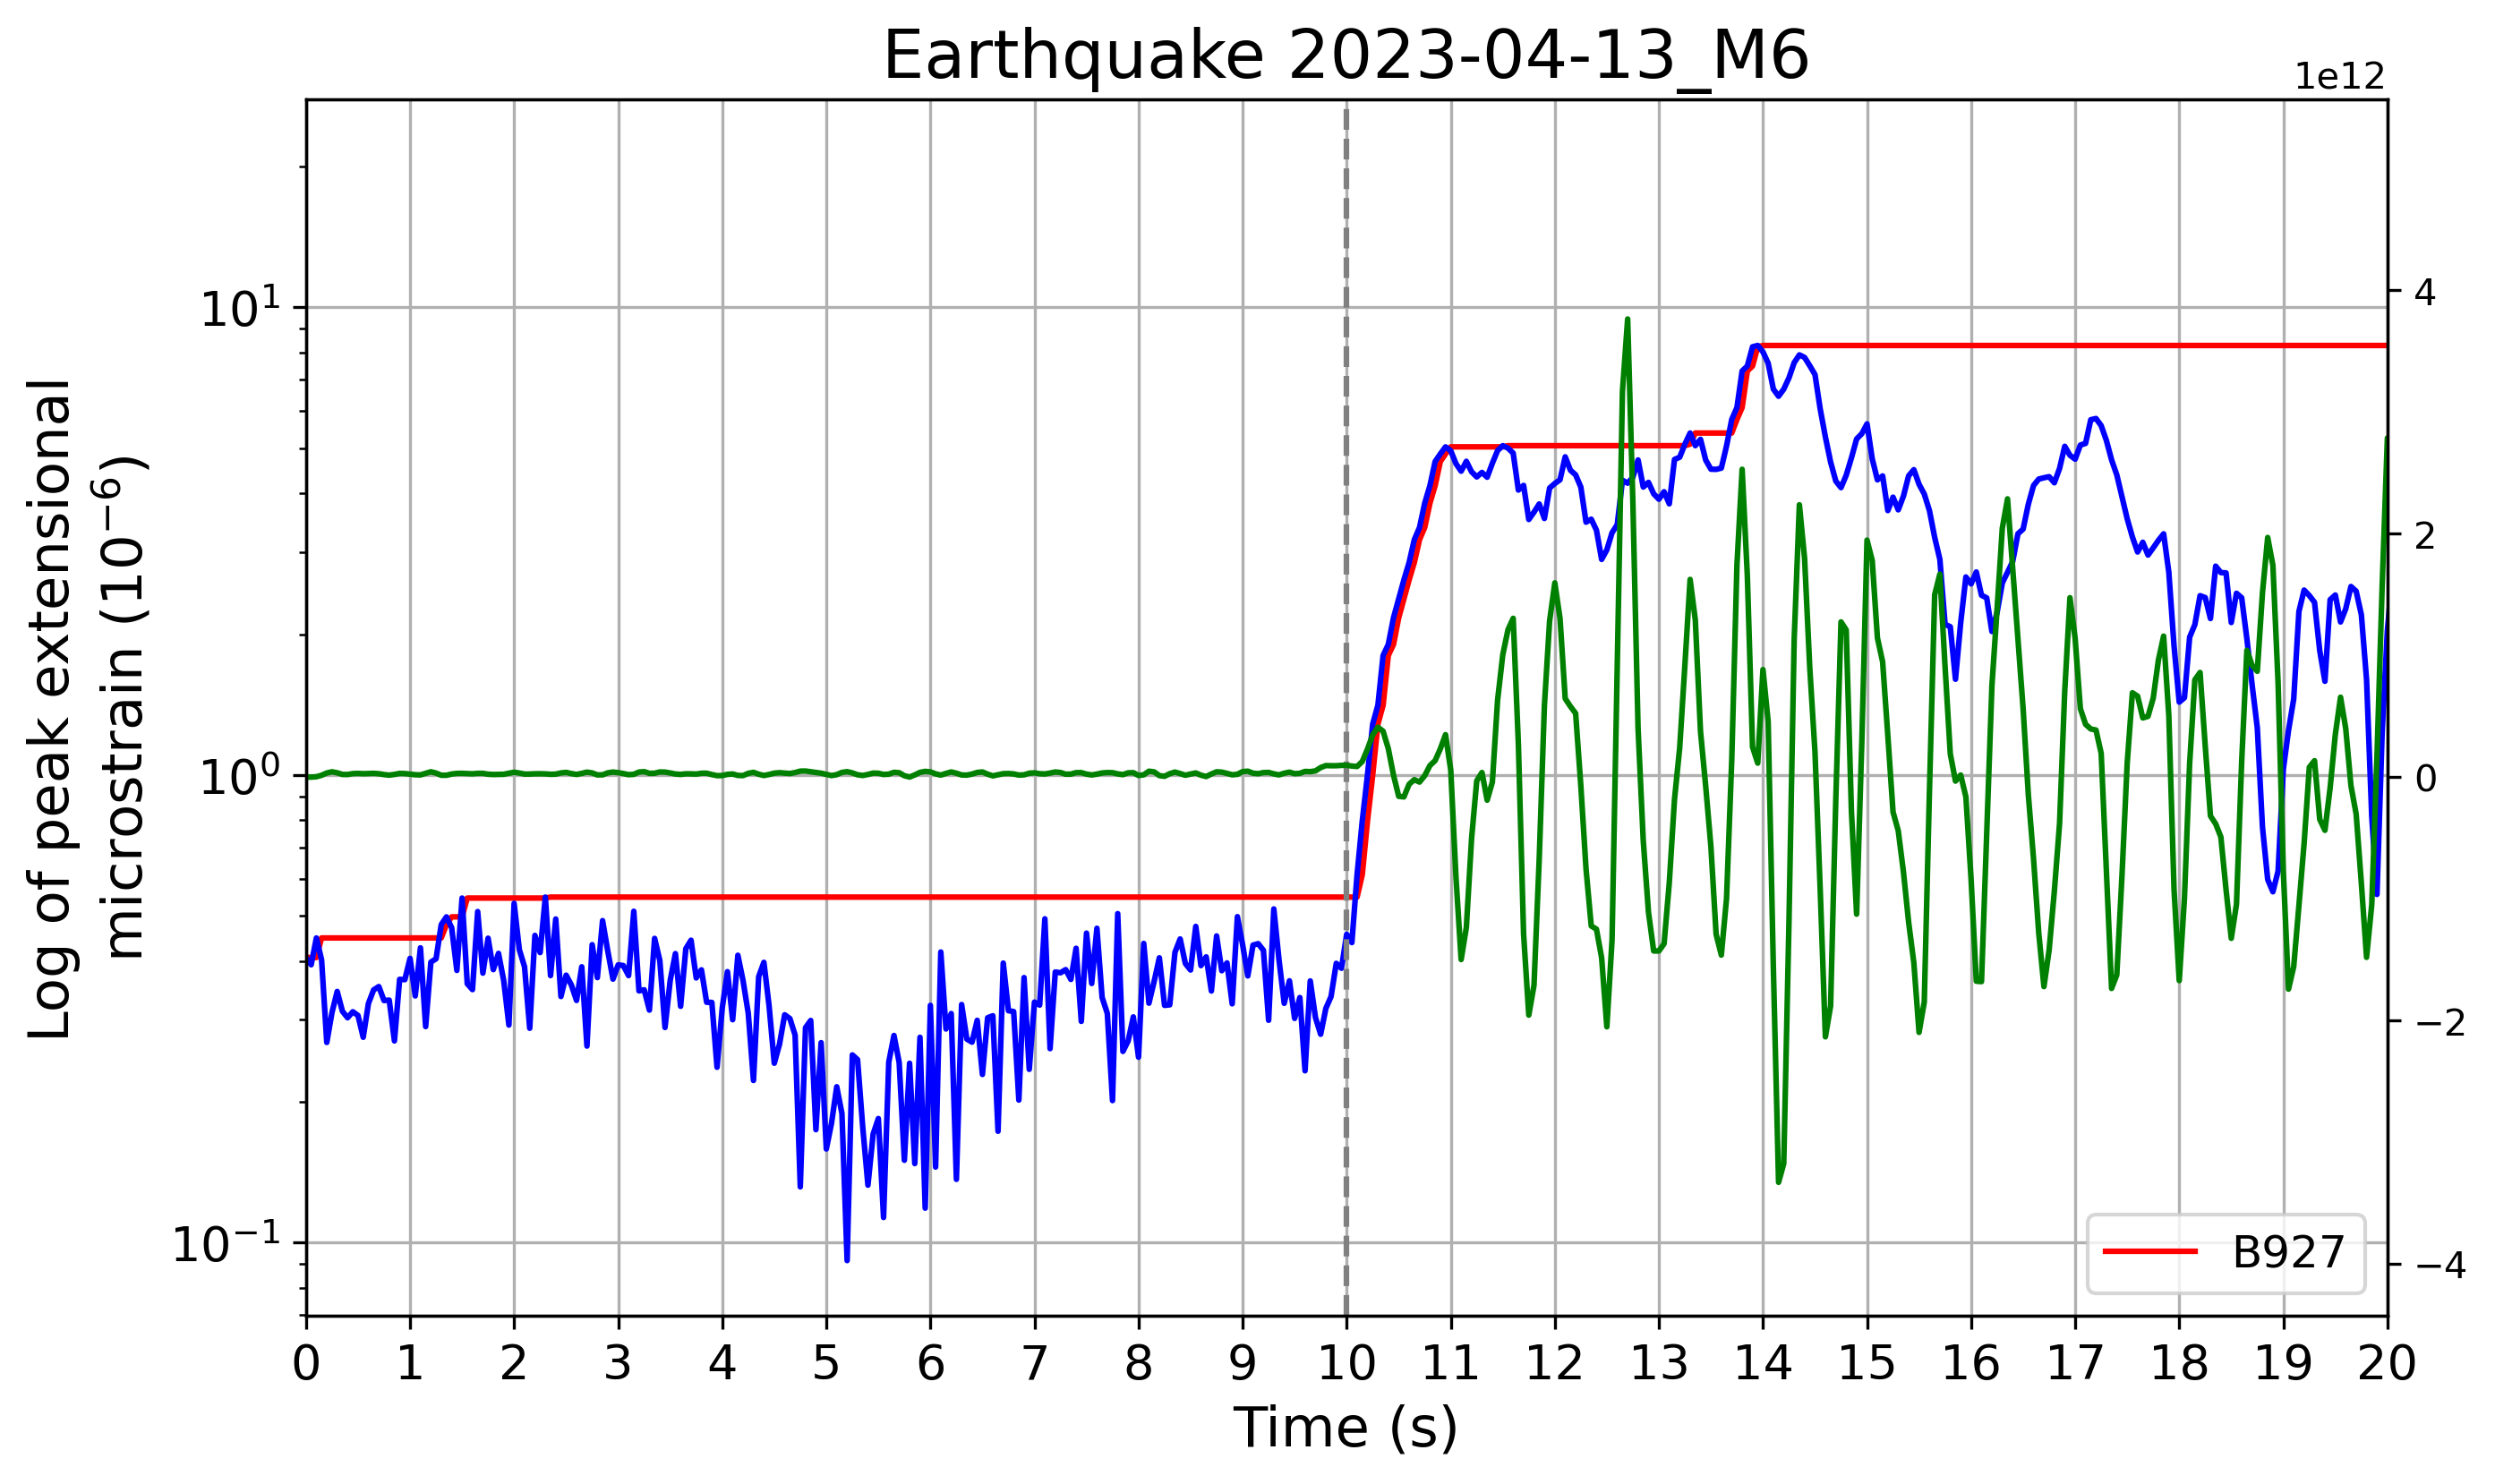

B928
20.0
20.0
100.0
20.0


ValueError: x and y must have same first dimension, but have shapes (2401,) and (2400,)

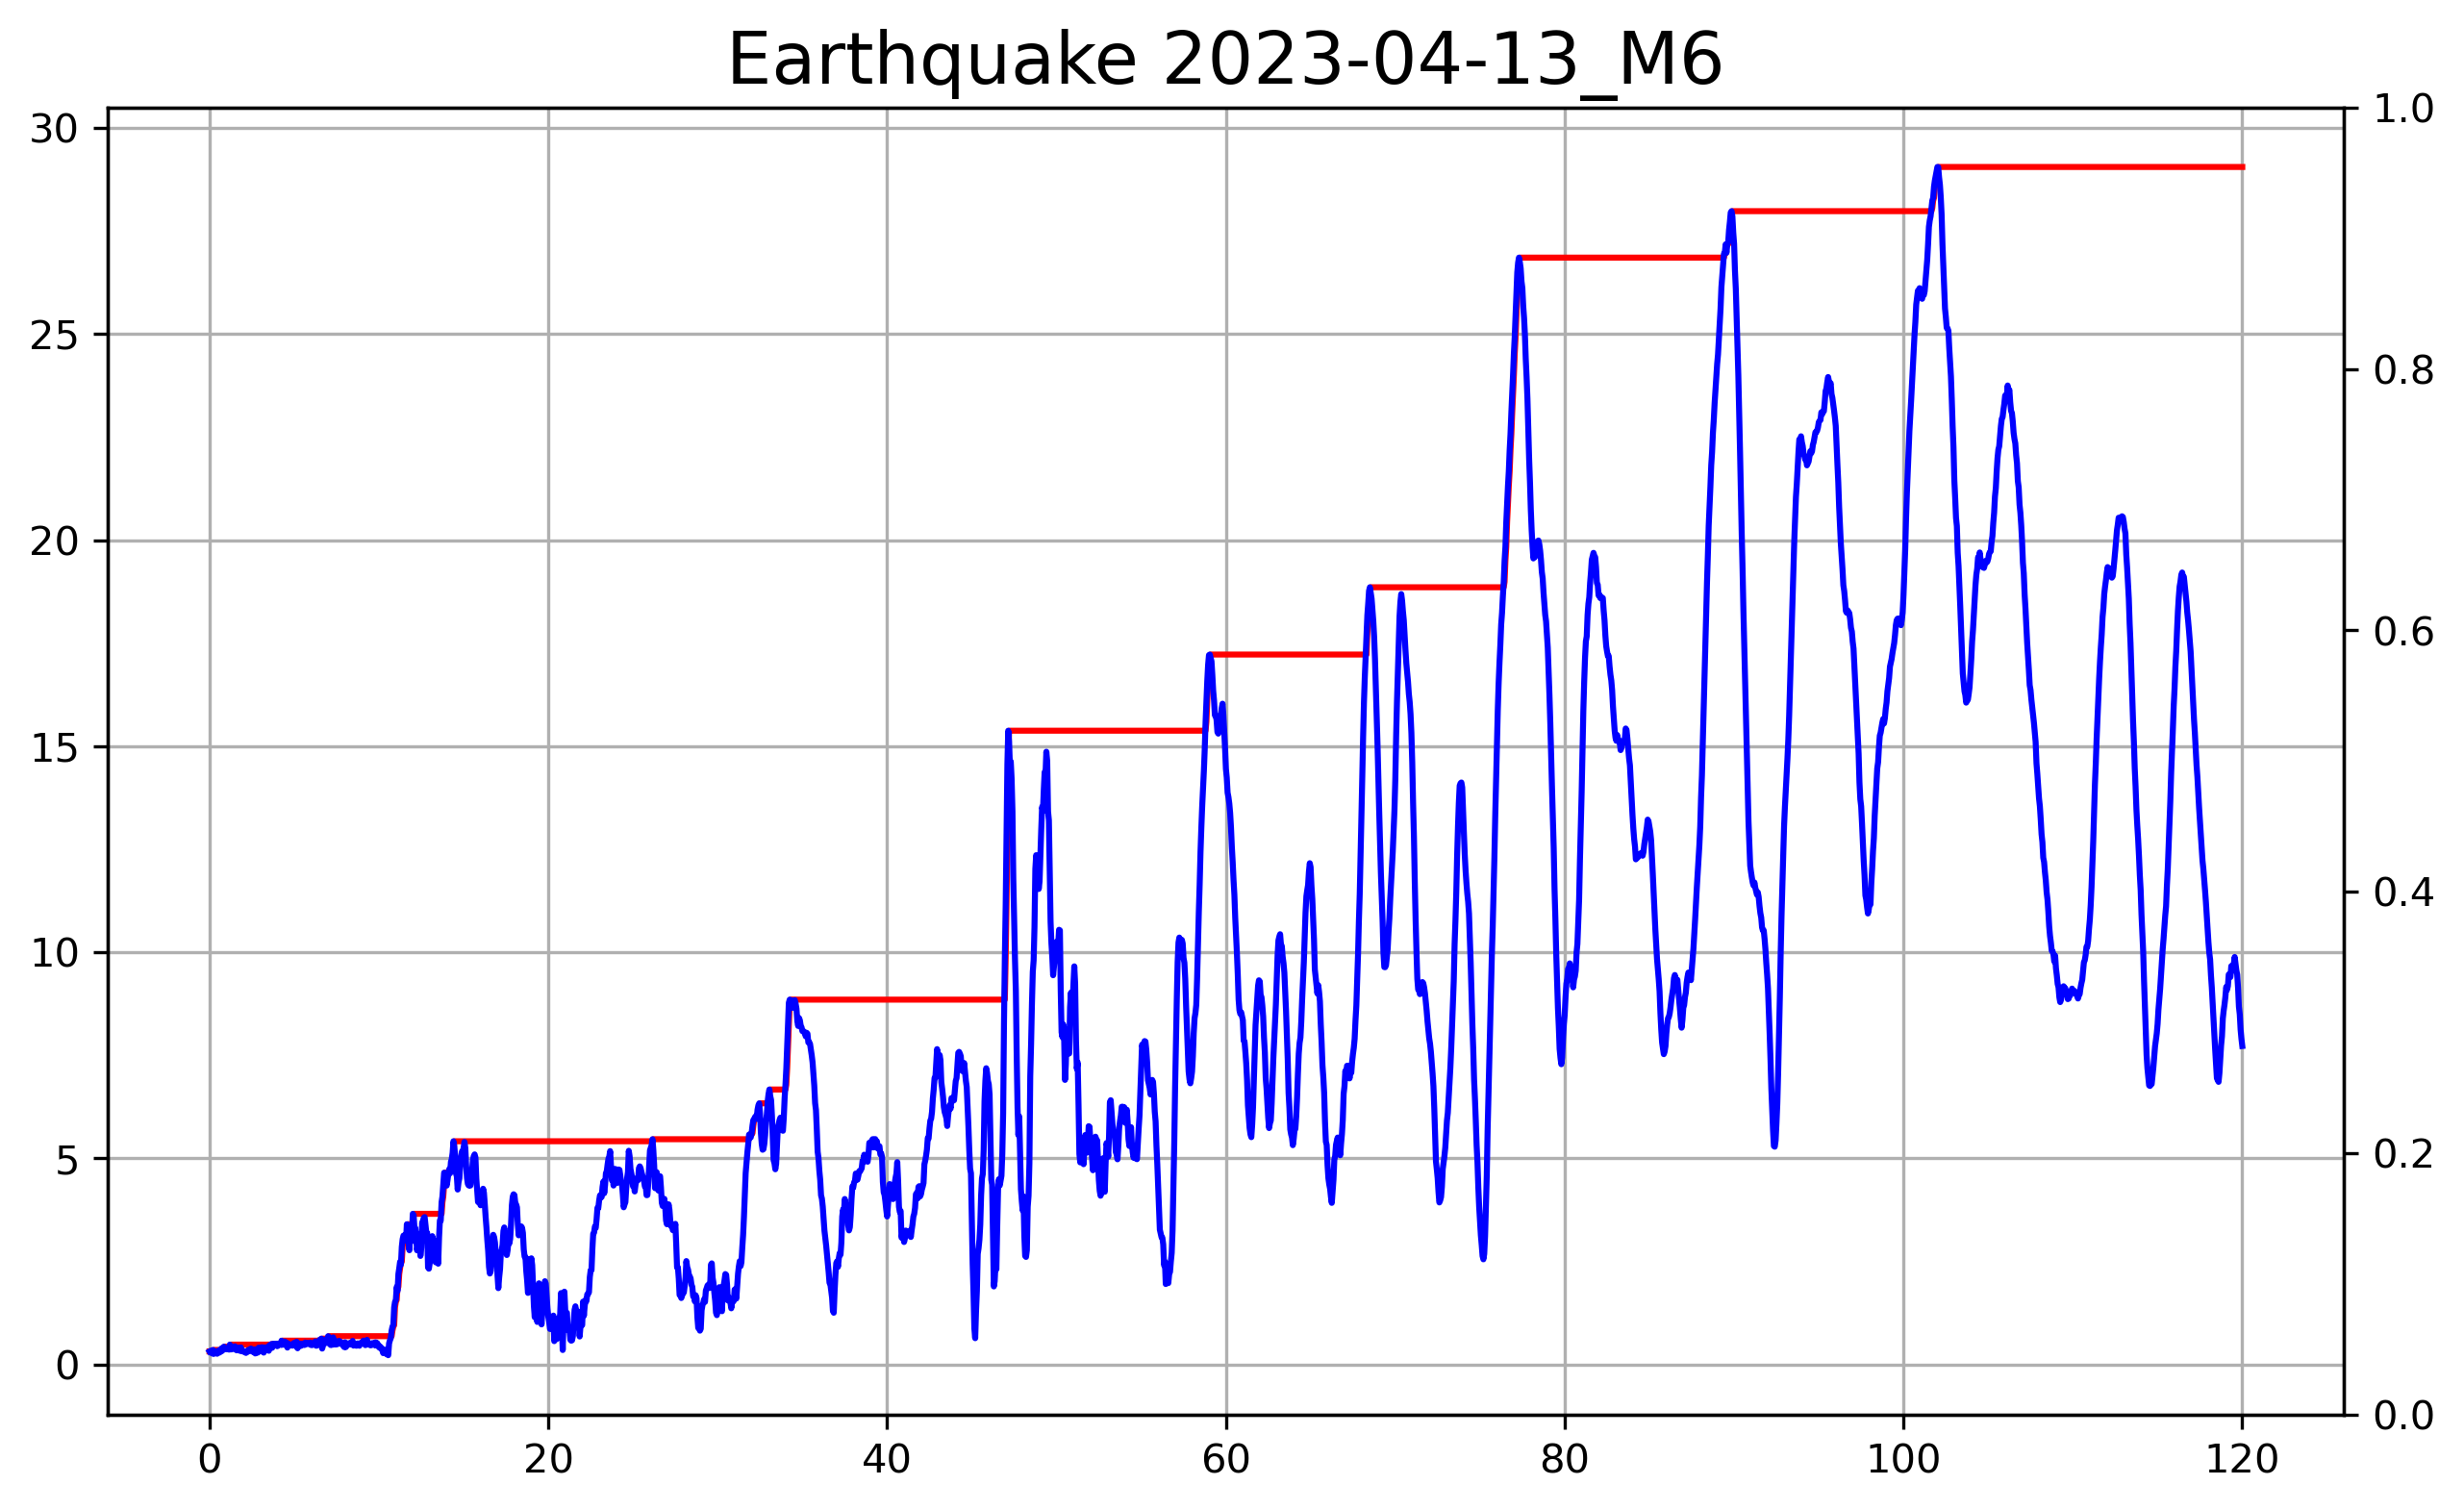

In [15]:
# cmap = plt.get_cmap('turbo', 500) 

for idx in range(len(earthquakes)):
    
    no_data = False
    
    if idx >= 31: # No data available for 4 earliest earthquakes
        no_data = True
        
    ot = origin_times[idx]
    print('Earthquake ' + str(idx+1) + '/' + str(len(mags)))
    
    if idx in rows_for_extra_times:
        cut_ot = ot[:13]
    else:
        cut_ot = ot[:10]
    
    eq_id = str(cut_ot) + '_M' + str(mags[idx])
#     print(eq_id)
        
    # Find rows that match this event in the array with the hypocentral distances
    
    i = np.where(dist_array[:,0] == eq_id)[0]
#     print(dist_array[i])
        
    for sta in stas:
        
        print(sta)
        
        try:
            
            # Peak strain data
        
            pst = read(path_to_files + 'strain_data/peak/' + str(cut_ot) + '_M' + str(mags[idx]) + '/' + str(sta) + '.mseed')
            strain_waves = read(path_to_files + 'strain_data/trimmed/' + str(cut_ot) + '_M' + str(mags[idx]) + '/' + str(sta) + '.mseed')
            seis_waves = read(path_to_files + 'seismic_data/trimmed/' + str(cut_ot) + '_M' + str(mags[idx]) + '/' + str(sta) + '.mseed')
                
        except:
            continue # skips to next station

        # Find row that matches this station within the rows of the right event

        j = np.where(dist_array[i,5] == sta)[0]

#             print(dist_array[i][j])

        hypdist = float(dist_array[i][j][0][8])
#         print(hypdist)
        
        int_hypdist = int(hypdist)
#         print(int_hypdist)

        pst_times = pst[0].times()
        pst_data = pst[0].data
        strain_waves_data = strain_waves[0].data
        
        print(pst[0].stats.sampling_rate)
        print(strain_waves[0].stats.sampling_rate)
        print(seis_waves[0].stats.sampling_rate)
        
        seis_waves[0].decimate(5)
        print(seis_waves[0].stats.sampling_rate)
        seis_waves_data = seis_waves[0].data

        # Plot stations, but avoid plotting the weird stations for the two problem earthquakes

        if idx == 4 and sta == 'B072' or sta == 'B076':
            print('Skipping ' + str(cut_ot) + ' ' + str(sta))

        elif idx == 15 and sta == 'B928':
            print('Skipping ' + str(cut_ot) + ' ' + str(sta))

        else:
            fig = plt.figure(figsize = (10,6), dpi = 300, facecolor = 'white', num = 1, clear = True)
            ax = fig.add_subplot(111)
            ax.grid()
            ax.set_title('Earthquake ' + str(cut_ot) + '_M' + str(mags[idx]), fontsize = 18)
            ax.plot(pst_times, pst_data*10**9, color = 'red', label = sta)
            ax.plot(pst_times, strain_waves_data*10**9, color = 'blue')
            ax2 = ax.twinx()
            ax2.plot(pst_times, seis_waves_data*10**9, color = 'green')
            ax.set_yscale('log')
            ax.set_ylabel('Log of peak extensional\nmicrostrain ($10^{-6}$)', fontsize = 15)
            ax.set_xlabel('Time (s)', fontsize = 15)
            ax.set_xlim(0,20)
            ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
            ax.axvline(x = 10, color = 'gray', linestyle = '--')
            ax.tick_params(labelsize = 13)
            ax.legend(loc = 'lower right', ncol = 2, fontsize = 12)
            plt.show()
            
    # Plot after each earthquake
    if no_data: 
        pass
    else:
        pass
#         cbar = fig.colorbar(plt.cm.ScalarMappable(norm = Normalize(0, 500), cmap = cmap), ax = ax)
#         cbar.ax.tick_params(labelsize = 11)
#         cbar.ax.set_ylabel(ylabel = 'Hypocentral distance (km)', fontsize = 13)
        
#         plt.savefig(path_to_files + 'figures/peak_strain_plots/NA_M6_500km/' + str(cut_ot) + '_M' + str(mags[idx]) + '.png', format = 'PNG')
#         plt.close();
